In [30]:
import plotly

In [31]:
import pandas as pd
path='data/'  # si les données sont déjà dans le répertoire courant
loading = pd.read_csv(path+'velibLoading.csv', sep = " ")
loading.head()

Lun-00    Lun-01    Lun-02    Lun-03    Lun-04    Lun-05    Lun-06  \
1  0.038462  0.038462  0.076923  0.038462  0.038462  0.038462  0.038462   
2  0.478261  0.478261  0.478261  0.434783  0.434783  0.434783  0.434783   
3  0.218182  0.145455  0.127273  0.109091  0.109091  0.109091  0.090909   
4  0.952381  0.952381  0.952381  0.952381  0.952381  0.952381  0.952381   
5  0.927536  0.811594  0.739130  0.724638  0.724638  0.724638  0.724638   

     Lun-07    Lun-08    Lun-09  ...    Dim-14    Dim-15    Dim-16    Dim-17  \
1  0.038462  0.107143  0.000000  ...  0.296296  0.111111  0.111111  0.148148   
2  0.434783  0.260870  0.043478  ...  0.043478  0.000000  0.217391  0.130435   
3  0.090909  0.054545  0.109091  ...  0.259259  0.259259  0.203704  0.129630   
4  1.000000  1.000000  1.000000  ...  1.000000  1.000000  0.904762  0.857143   
5  0.724638  0.753623  0.971014  ...  0.227273  0.454545  0.590909  0.833333   

     Dim-18    Dim-19    Dim-20    Dim-21    Dim-22    Dim-23  
1  0.307692  0.076923  0.115385  0.076923  0.153846  0.153846  
2  0.045455  0.173913  0.173913  0.173913  0.260870  0.391304  
3  0.148148  0.296296  0.314815  0.370370  0.370370  0.407407  
4  0.857143  0.857143  0.761905  0.761905  0.761905  0.761905  
5  1.000000  0.818182  0.636364  0.712121  0.621212  0.575758  

[5 rows x 168 columns]

In [32]:
Coord = pd.read_csv(path+'velibCoord.csv', sep = " ")
Coord.head()

longitude   latitude  bonus              names
1   2.377389  48.886300      0   EURYALE DEHAYNIN
2   2.317591  48.890020      0          LEMERCIER
3   2.330447  48.850297      0    MEZIERES RENNES
4   2.271396  48.833734      0             FARMAN
5   2.366897  48.845887      0   QUAI DE LA RAPEE

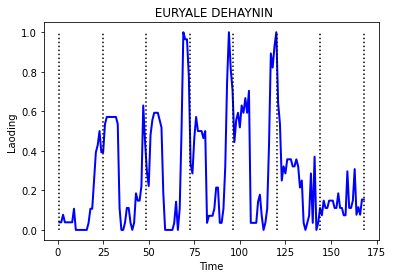

In [51]:
# Plot the loading of the first station
%matplotlib inline
from pylab import * 
import numpy as np

p = loading.columns.size
Time = np.linspace(1, p, p)
plot(Time, loading.transpose()[1], linewidth = 2, color = 'blue')
xlabel('Time'); ylabel('Laoding'); title(Coord.names[1])
vlines(x = np.linspace(1, p, 8), ymin = 0, ymax = 1, colors = "black", linestyle = "dotted")
show()

In [34]:
count_nonzero(Coord["bonus"])/(len(Coord["bonus"]))

0.10681244743481917

## Analyse Descriptive

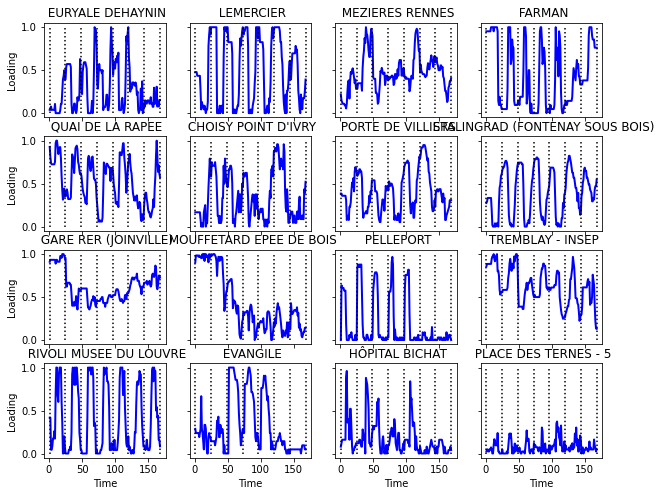

In [35]:
fig, axs = subplots(4, 4, figsize=(10,8))
p = loading.columns.size
Time = np.linspace(1, p, p)

for i in range(4):
    for j in range(4):
        axs[i,j].plot(Time, loading.transpose()[4*i+j+1], linewidth = 2, color = 'blue')
        axs[i,j].set_title(Coord.names[4*i+j+1])
        axs[i,j].vlines(x = np.linspace(1, p, 8), ymin = 0, ymax = 1, colors = "black", linestyle = "dotted")
        
        
for ax in axs.flat:
    ax.set(xlabel='Time', ylabel='Loading')  
for ax in axs.flat:
    ax.label_outer()

        
show()

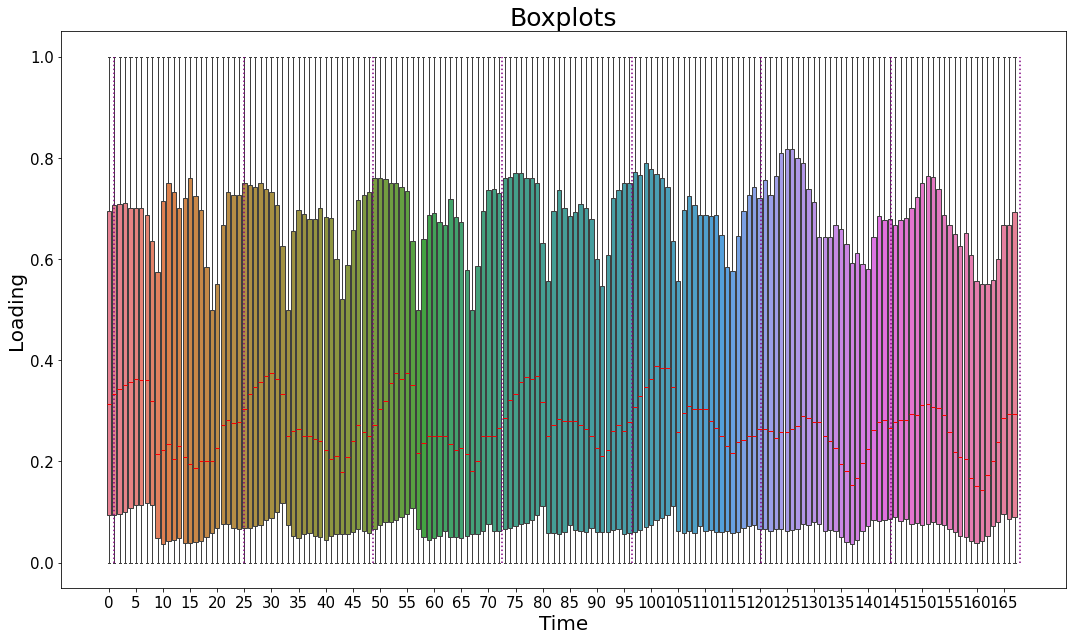

In [36]:
import seaborn as sns
%matplotlib inline

figure(figsize = (15,9))

ar=np.array(loading)
bp = sns.boxplot(data=ar, medianprops={"color": "red"},)
vlines(x = np.linspace(1, p, 8), ymin = 0, ymax = 1, colors = "purple", linestyle = "dotted",)

plt.xlabel('Time',fontsize = 20)
plt.ylabel('Loading', fontsize = 20)
plt.title("Boxplots", fontsize = 25)
plt.xticks(ticks = np.arange(0,168,5), labels=np.arange(0,168,5), fontsize= 15)
plt.yticks(fontsize = 15)
plt.tight_layout()
plt.show()

## Chargement par heure moyen par jour

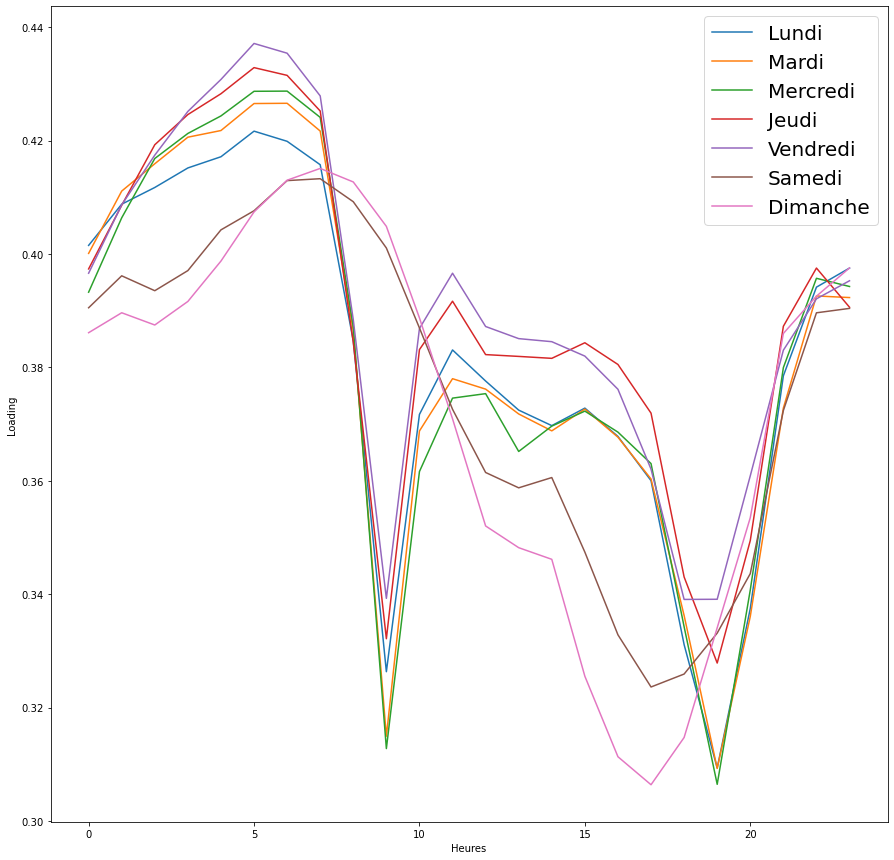

In [37]:
figure(figsize = (15,15))

MoyHeures=np.sum(loading,axis=0)/1189
MoyHeures=np.array(MoyHeures)
#print(MoyHeures)
jours = ["Lundi","Mardi","Mercredi","Jeudi","Vendredi","Samedi","Dimanche"]
MoyHeuresPJours=np.reshape(MoyHeures,(24,7), order='F')
plot(MoyHeuresPJours)
xlabel("Heures")
ylabel("Loading")
legend(jours, prop={'size' : 20})
show()

In [38]:
import plotly.express as px


Position=np.array(Coord)[:,0:2]


a6 = np.arange(6,168,24, dtype=int)
data6h=np.mean(np.array(loading)[:,a6],axis=1)




fig6 = px.scatter_mapbox(data6h ,Position[:,1],Position[:,0], color = data6h,color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10, mapbox_style="carto-positron")
fig6.show()

a12 = np.arange(12,168,24, dtype=int)
data12h=np.mean(np.array(loading)[:,a12],axis=1)




fig12 = px.scatter_mapbox(data12h ,Position[:,1],Position[:,0], color = data12h,color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10, mapbox_style="carto-positron")
fig12.show()

a23 = np.arange(23,168,24, dtype=int)
data23h=np.mean(np.array(loading)[:,a23],axis=1)



fig23 = px.scatter_mapbox(data23h ,Position[:,1],Position[:,0], color = data23h,color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10, mapbox_style="carto-positron")
fig23.show()

In [39]:
bonus=np.array(Coord)[:,2]
#help(px.scatter_mapbox)
data24h=np.mean(np.array(loading),axis=1)
figbonus = px.scatter_mapbox(Coord ,'latitude','longitude', color_discrete_sequence=[ 'blue', 'red'], color='bonus',size_max=15, zoom=10, mapbox_style="carto-positron",)
figbonus.show()


In [40]:
loading.head()
loading.describe()
x=np.array(loading)

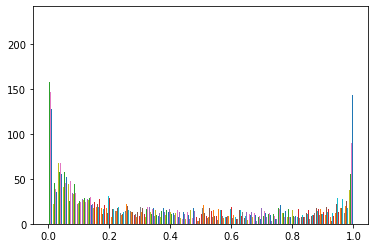

In [41]:
plt.hist(x, bins=64)
plt.show()

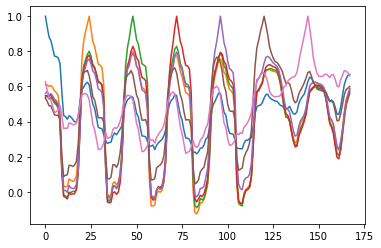

In [42]:
correlation=np.corrcoef(x.T)
for i in range(int(len(correlation)/24)):
    plt.plot(correlation[i*24])

c:\Users\romai\miniconda3\lib\site-packages\pyensae\graphhelper\linkage.py:43: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



<AxesSubplot:>

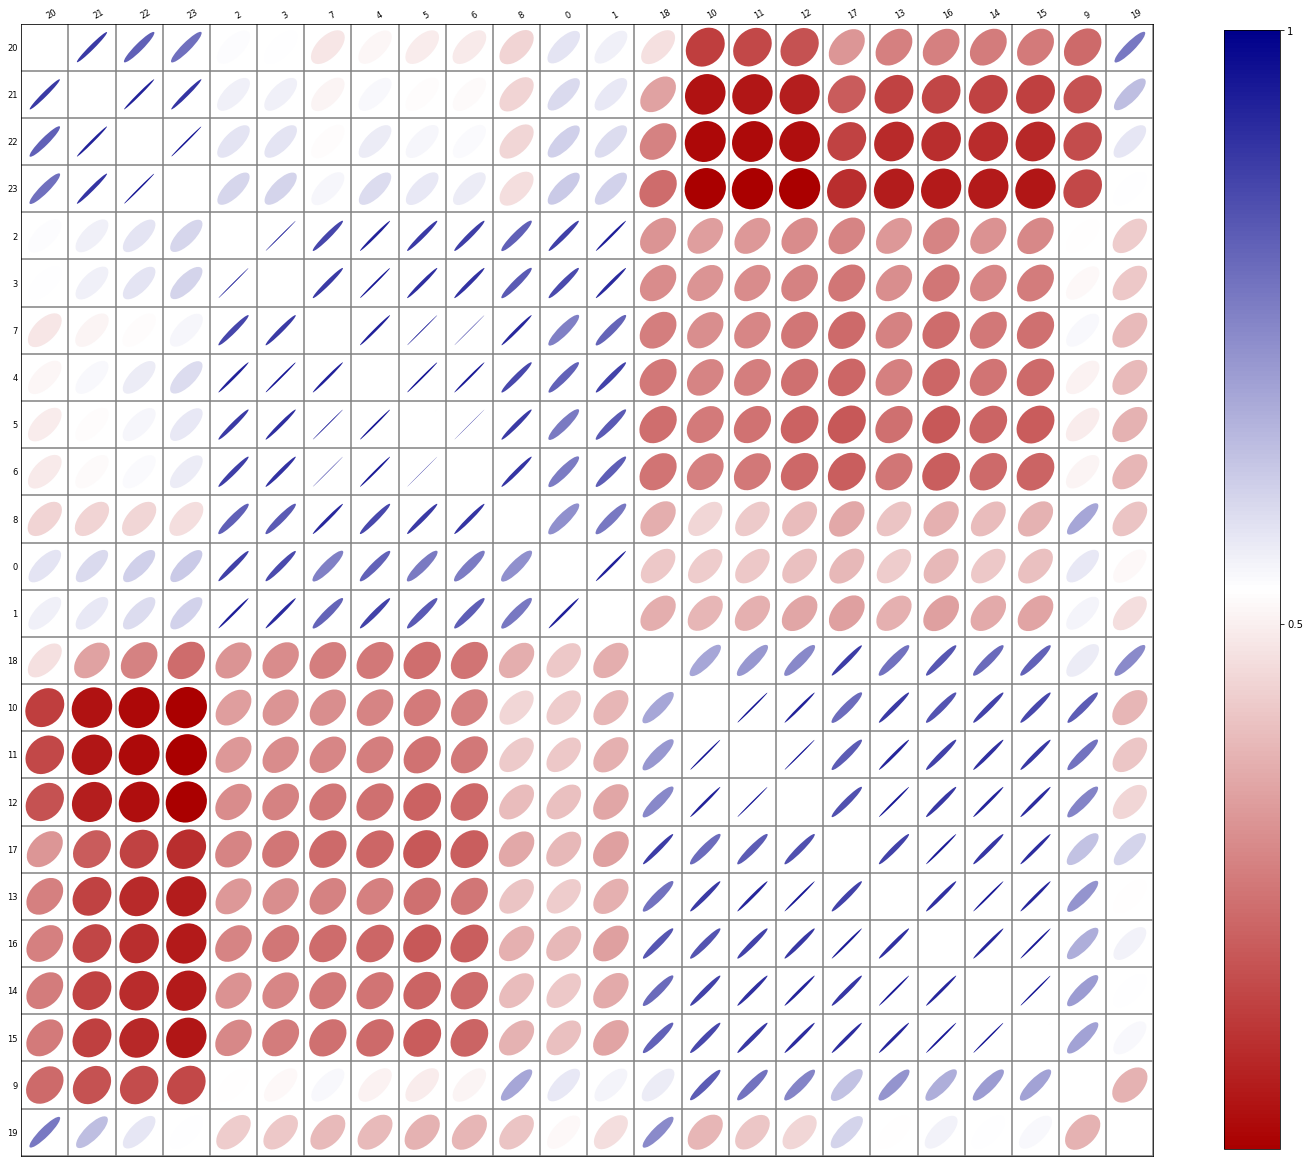

In [43]:
from pyensae.graphhelper import Corrplot

c = Corrplot(x[:,0:24])
c.plot(figsize=(20,20))



In [49]:
from pandas.plotting import scatter_matrix
scatter_matrix(loading[["Lun-12","Lun-13","Mar-12","Mar-13","Ven-12","Ven-13","Lun-18","Ven-18"]], alpha=0.2, 
               figsize=(15, 15), diagonal='kde')
plt.show()

ImportError: matplotlib is required for plotting when the default backend "matplotlib" is selected.

# PCA

## Implémentation de la PCA

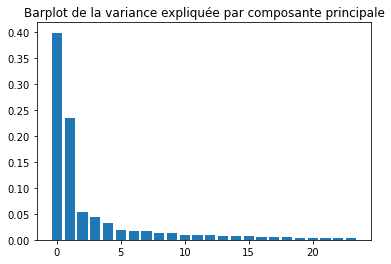

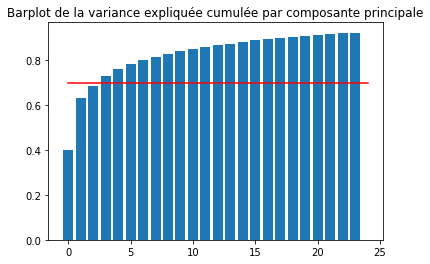

In [52]:
from sklearn.decomposition import PCA 
from sklearn.preprocessing import scale

pca = PCA()
#On estime nos composantes principales
pcaR = pd.DataFrame(scale(loading), columns = loading.columns)
C = pca.fit(pcaR).transform(pcaR)
## Décroissance de la variance expliquée
plt.bar(np.arange(len(pca.explained_variance_ratio_))[0:24],height=pca.explained_variance_ratio_[0:24])
plt.title("Barplot de la variance expliquée par composante principale")
plt.show()
plt.bar(np.arange(len(pca.explained_variance_ratio_))[0:24],height=np.cumsum(pca.explained_variance_ratio_[0:24]))
plt.plot(range(0,25), np.ones(25)*0.7, c='r')
plt.title("Barplot de la variance expliquée cumulée par composante principale")
plt.show()

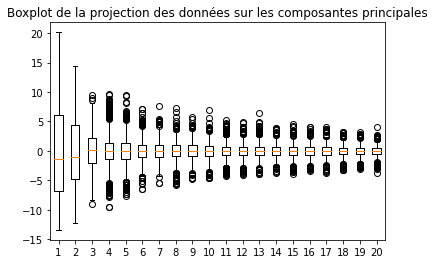

In [53]:
plt.boxplot(C[:,0:20])
plt.title("Boxplot de la projection des données sur les composantes principales")
plt.show()

## Projection des variables sur le plan d'ACP

C:\Users\romai\AppData\Local\Temp/ipykernel_30788/3335837705.py:6: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



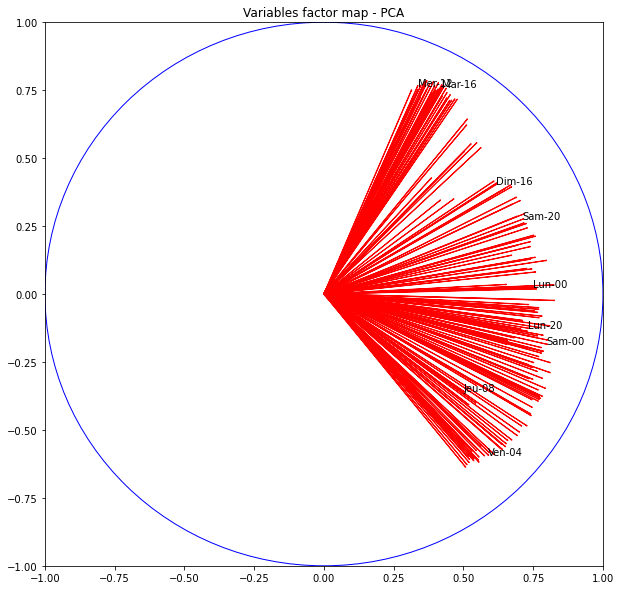

In [54]:
coord1 = pca.components_[0] * np.sqrt(pca.explained_variance_[0])
coord2 = pca.components_[1] * np.sqrt(pca.explained_variance_[1])
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1, coord2, loading.columns):
    if int(np.argwhere(coord1==i))%20==0 : 
        plt.text(i, j, nom)
    plt.arrow(0, 0, i, j, color = 'r', width = 0.001)
plt.axis((-1, 1, -1, 1))
#Cercle
c = plt.Circle((0, 0), radius = 1, color = 'b', fill = False)
ax.add_patch(c)
plt.title('Variables factor map - PCA')
plt.show()
#différencier jour/nuit

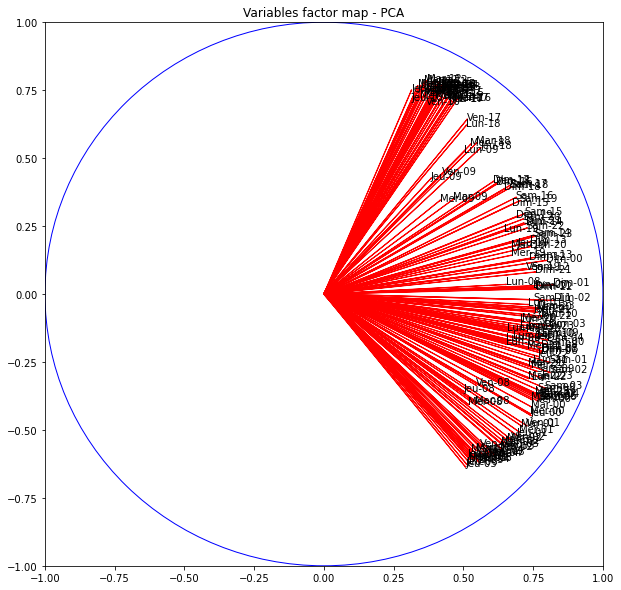

In [55]:
coord1 = pca.components_[0] * np.sqrt(pca.explained_variance_[0])
coord2 = pca.components_[1] * np.sqrt(pca.explained_variance_[1])
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1, coord2, loading.columns):
    plt.text(i, j, nom)
    plt.arrow(0, 0, i, j, color = 'r', width = 0.001)
plt.axis((-1, 1, -1, 1))
#Cercle
c = plt.Circle((0, 0), radius = 1, color = 'b', fill = False)
ax.add_patch(c)
plt.title('Variables factor map - PCA')
plt.show()
#différencier jour/nuit

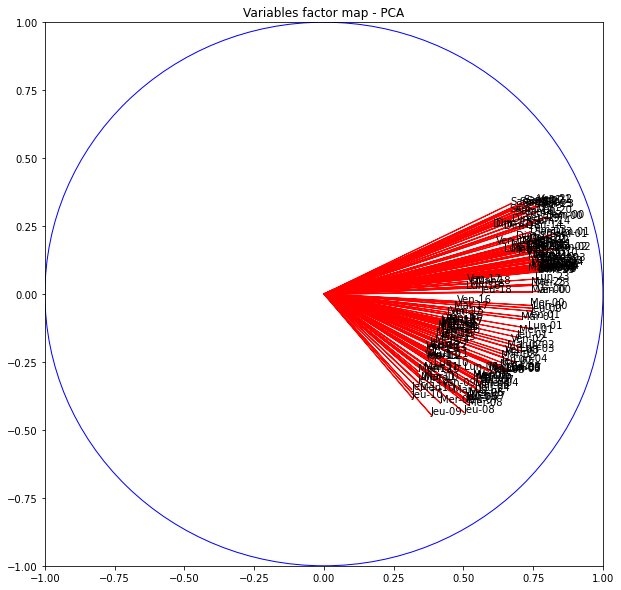

In [56]:
coord1 = pca.components_[0] * np.sqrt(pca.explained_variance_[0])
coord2 = pca.components_[2] * np.sqrt(pca.explained_variance_[2])
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1, coord2, loading.columns):
    plt.text(i, j, nom)
    plt.arrow(0, 0, i, j, color = 'r', width = 0.001)
plt.axis((-1, 1, -1, 1))
#Cercle
c = plt.Circle((0, 0), radius = 1, color = 'b', fill = False)
ax.add_patch(c)
plt.title('Variables factor map - PCA')
plt.show()
#différencier jour/nuit

## Interprétation des dimensions de l'ACP

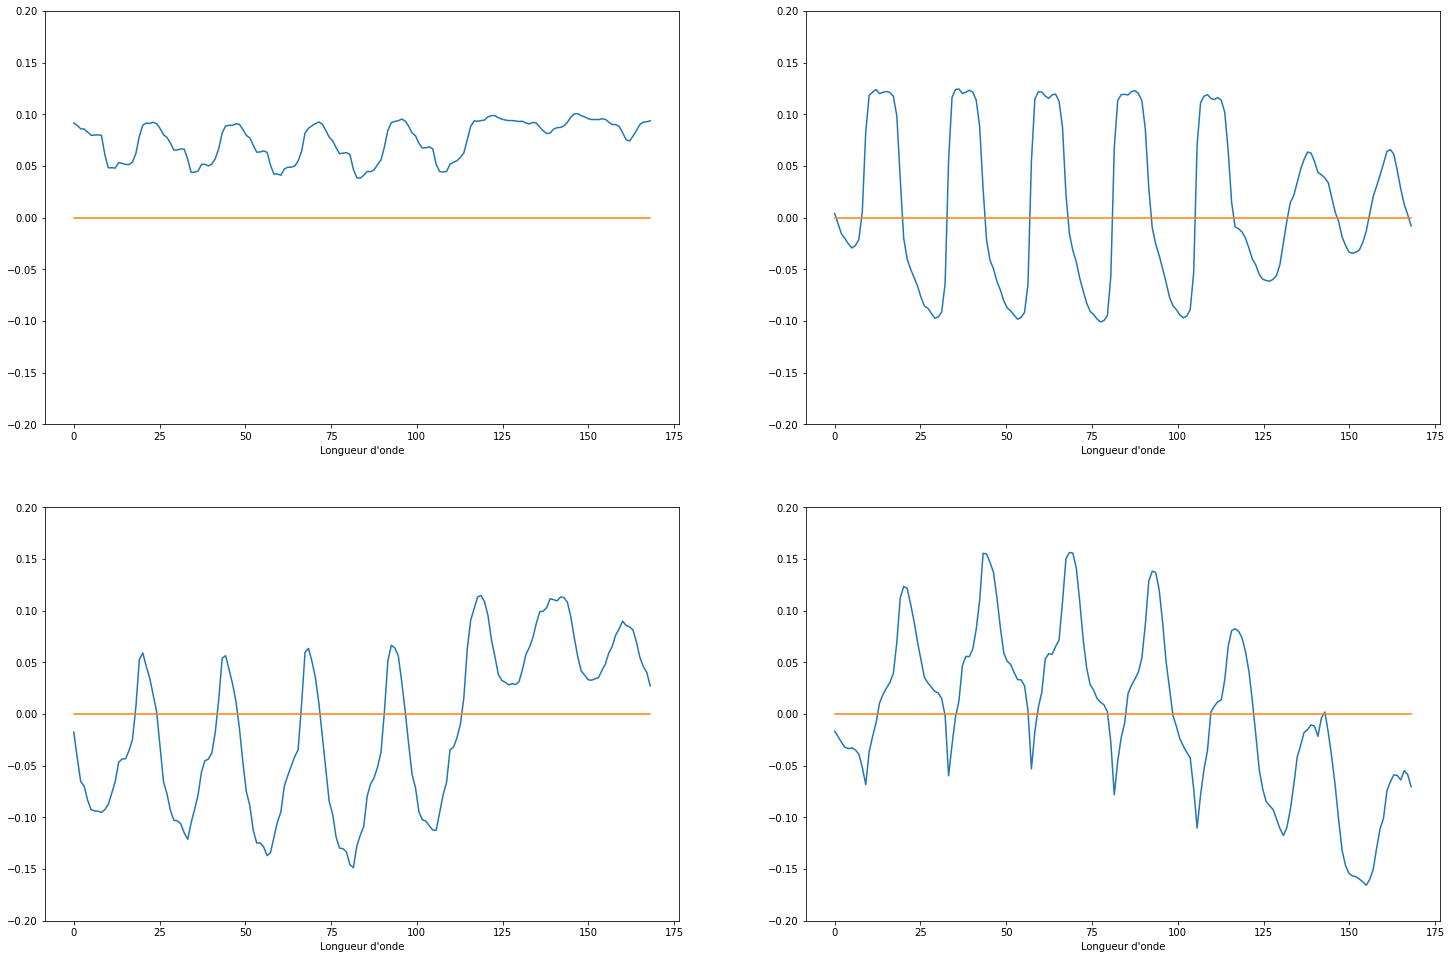

In [57]:
fig = plt.figure(1, figsize = (25, 35))
u= np.linspace(0,168,168)
for i in range(4):
   fig.add_subplot(4, 2, i+1)
   plt.ylim((-0.2, 0.2))
   plt.plot(u, pca.components_[i])
   plt.plot(u, [0] * len(u))
   plt.xlabel("Longueur d'onde")
plt.show()

Les 4 plots représentent les coefficients pour les 168 heures, et pour les 4 premières dimensions de l'ACP.

Le premier plot (sur la dimension 1) représente la moyenne des chargements sur toutes les stations au cours des heures.

Le deuxième plot (sur la dimension 2) le contraste entre le jour et la nuit: en pleine journée les coeffs sont positifs alors que la nuit ils sont négatifs.

Le troisième plot (sur la dimension 3) le contraste entre les jours en pleine semaine et weekend.

## Projection des individus sur le plan ACP

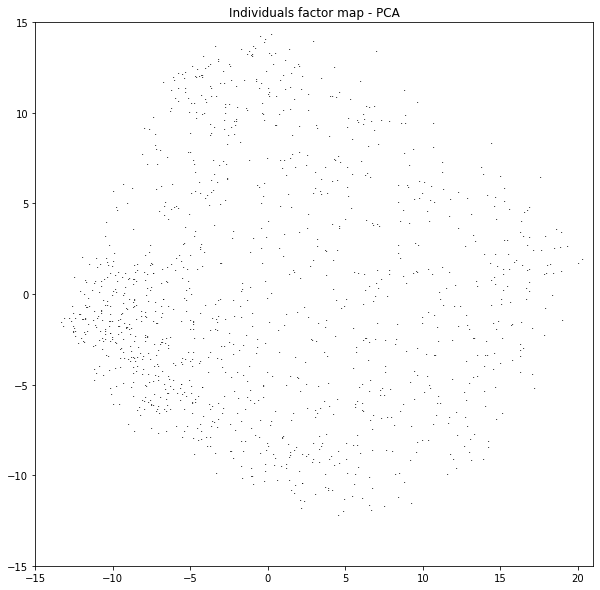

In [58]:
pc1 = C[:,0]
pc2 = C[:,1]
plt.figure(figsize = (10, 10))
for i, j in zip(pc1, pc2):
    plt.text(i, j, ".")
plt.axis((-15, 21, -15, 15))
plt.title('Individuals factor map - PCA')
plt.show()

In [59]:
#print(C)
velib_PCA_reduced= C[:,:3] #pourquoi c'est 3 ???
#print(velib_PCA_reduced)

# Clustering

## Kmeans

In [ ]:
#pip install yellowbrick

In [61]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from matplotlib import colors
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from scipy.spatial.distance import cdist
from matplotlib.patches import Ellipse

In [62]:
def matchClasses(classif1, classif2):
    cm = confusion_matrix(classif1, classif2)
    K = cm.shape[0]
    a, b = np.zeros(K), np.zeros(K)
    for j in range(K):
        for i in range(K):
            if (a[j] < cm[i,j]):
                a[j] = cm[i,j]
                b[j] = i 
    a = a.astype(int)
    b = b.astype(int)
                                             
    print ("")
    print ("Classes size:", a)
    print ("Class (in the classif1 numbering):", b)
    print ("")
    
    table = cm.copy()
    for i in range(K):
        table[:,b[i]] = cm[:,i]   
        
    clusters = classif2.copy()
    n = classif2.shape[0]
    for i in range(n):
        for j in range(K):
            if (classif2[i] == j):
                clusters[i] = b[j]
        
    return table, clusters

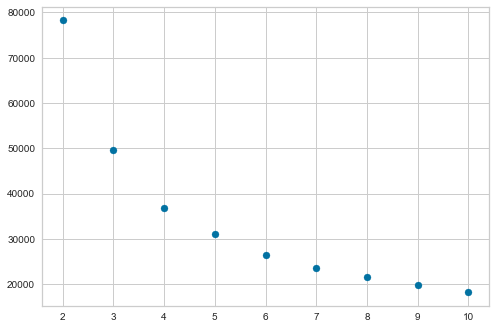

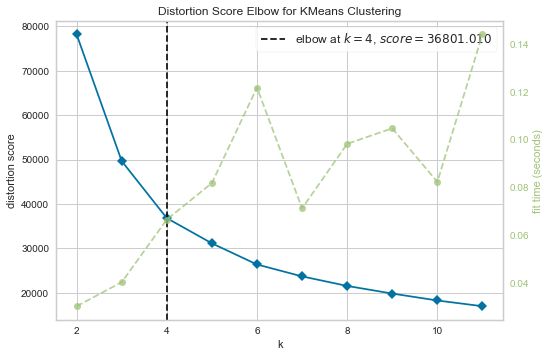

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [63]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=42)
    kmeans.fit(velib_PCA_reduced)
    inertia.append(kmeans.inertia_)
inertia = np.array(inertia)

plt.scatter(range(2, 11), inertia[1:])
plt.show()


kmeans = KMeans(init='k-means++', n_init=10, max_iter=100, random_state=42)
visualizer = KElbowVisualizer(kmeans, k=(2,12))

visualizer.fit(velib_PCA_reduced)   
visualizer.show()    

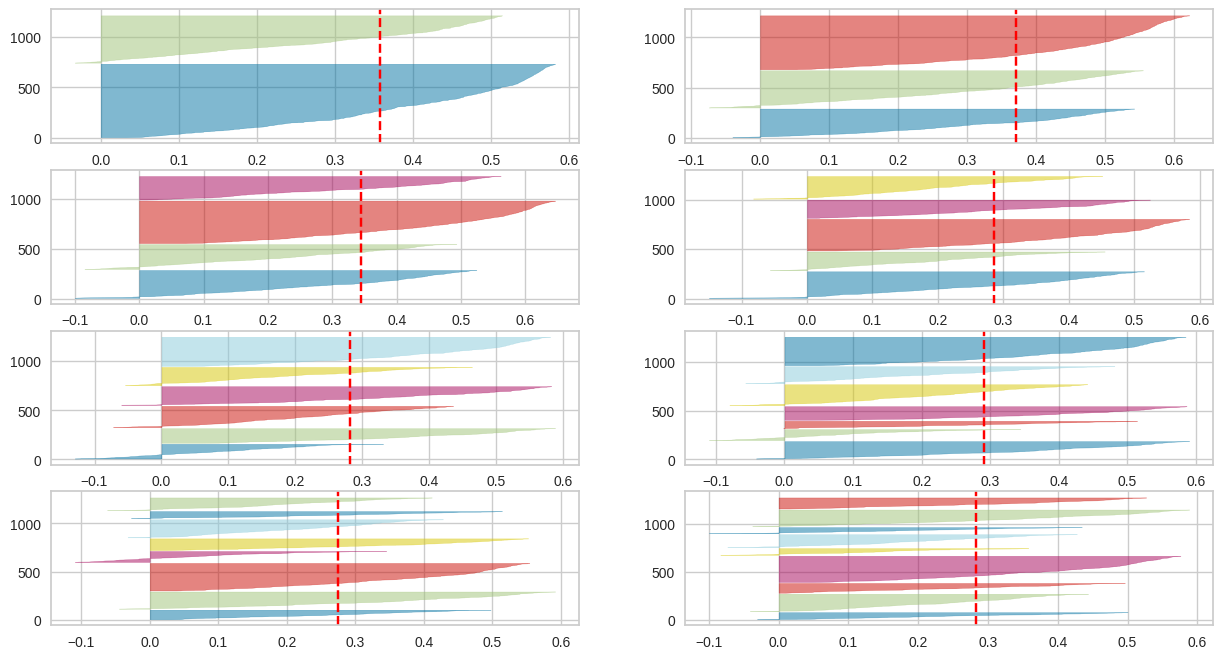

In [ ]:
fig, ax = plt.subplots(4, 2, figsize=(15,8))

for k in range(2, 10):
   
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(k, 2)
    
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(velib_PCA_reduced)

In [64]:
K = 4
kmeans_pca = KMeans(n_clusters=K, random_state=0)
clusters_pca = kmeans_pca.fit_predict(velib_PCA_reduced)
cmap = plt.get_cmap('Set3',K)

De ce que l'on peut observer grâce à la méthode du coude. Et en choisissant le graphe silouhette ayant le moins de valeurs négatives et dont les pics dépassent tous la ligne rouge. On voit que 4 clusters est le meilleur choix. On utilisera donc K = 4 pour la suite.

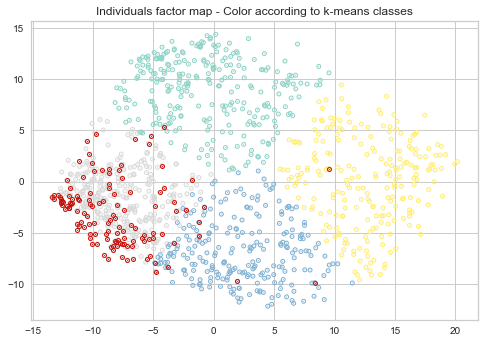

In [65]:
# on plot par rapport au clustering fait sur le jeu de données réduit
plt.scatter(velib_PCA_reduced[:,0], velib_PCA_reduced[:,1], c=clusters_pca, s=1, linewidths=4, cmap=cmap)
plt.scatter(velib_PCA_reduced[np.where(bonus==1),0], velib_PCA_reduced[np.where(bonus==1),1], c='r',s=1, linewidths=4,cmap=cmap, )
plt.title("Individuals factor map - Color according to k-means classes")
plt.grid(True)
plt.show()
# A rajouter : mettre les stations en altitude (bonus =1)???

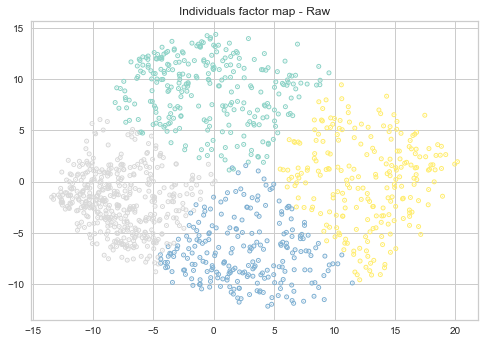

In [66]:
#On fait un clustering Kmeans sur le jeu de données loading complet
K = 4
kmeans_raw = KMeans(n_clusters=K, random_state=0)
clusters_raw = kmeans_pca.fit_predict(loading)

plt.scatter(velib_PCA_reduced[:,0], velib_PCA_reduced[:,1], c=clusters_raw, s=1, linewidths=4, cmap=cmap)
plt.title("Individuals factor map - Raw")
plt.show()

Matrice de confusions pour comparer nos clusters:


Classes size: [276 234 423 233]
Class (in the classif1 numbering): [0 1 2 3]



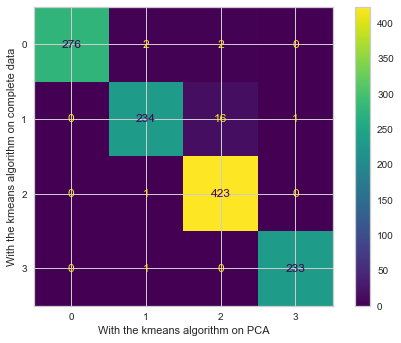

In [67]:
cm, clusters_kmean_raw_sorted = matchClasses(clusters_pca, clusters_raw)

ConfusionMatrixDisplay(cm).plot()
plt.xlabel('With the kmeans algorithm on PCA')
plt.ylabel('With the kmeans algorithm on complete data')

plt.show()

Faire du Kmeans sur le jeu de données PCA (réduit) ou le jeu de données Brut est similaire. Mais avec PCA on a réduit la dimensions, donc plus intéressant.

Visualiser par cartographie le Kmeans :

In [68]:
Position=np.array(Coord)[:,0:2]

df_clusters =  pd.DataFrame({
    'latitude': Position[:,1],
    'longitude': Position[:,0],
    'cluster': clusters_pca.astype(int)
    

})


fig_cluster_pca = px.scatter_mapbox(clusters_pca ,Position[:,1],Position[:,0], color = clusters_pca,
                        color_discrete_sequence=['red', 'blue', 'green', 'fuchsia'], 
                        size_max=15, zoom=10, mapbox_style="carto-positron",
                                   title ="Individual factor map with clusters kmeans on PCA data")
fig_cluster_pca.show()

In [69]:
df_clusters =  pd.DataFrame({
    'latitude': Position[:,1],
    'longitude': Position[:,0],
    'cluster': clusters_kmean_raw_sorted.astype(int)

})


fig_cluster_raw = px.scatter_mapbox(clusters_kmean_raw_sorted ,Position[:,1],Position[:,0], color = clusters_kmean_raw_sorted,
                        color_discrete_sequence=['red', 'blue', 'green', 'fuchsia'], 
                        size_max=15, zoom=10, mapbox_style="carto-positron",title ="Individual factor map with clusters kmeans on complete data")
fig_cluster_raw.show()

On remarque qu'il n'y a presque aucun changement entre les deux cartographies, que ce soit pour les clusters faits sur les données PCA, ou les clusters faits sur les données brutes. Ceci nous donne le même résultat qu'obtenu par la table de contingence.

In [70]:
bonus=np.array(Coord)[:,2]
fig_alt = px.scatter_mapbox(bonus, lat=Position[:,1], lon=Position[:,0], color=bonus,
                    color_discrete_sequence=['goldenrod', 'fuchsia'],
                  size_max=15, zoom=10,
                  mapbox_style="carto-positron", title='individual facor map for a "cluster" based on the "bonus" variable')
fig_alt.update_layout(showlegend=True)
fig_alt.show()

## Que valent ces 4 clusters Kmeans?

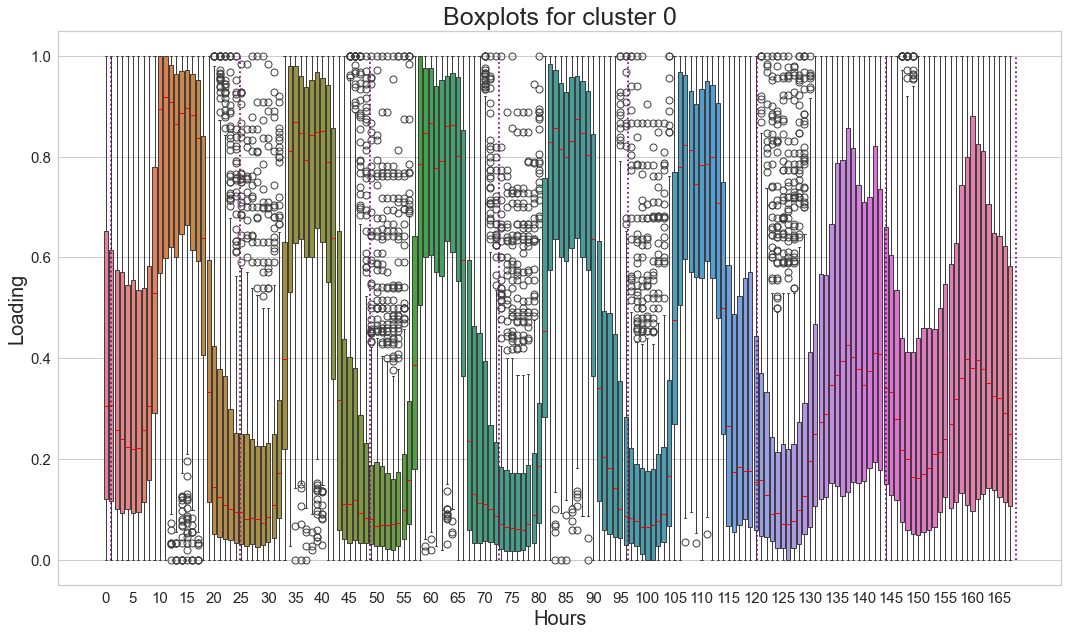

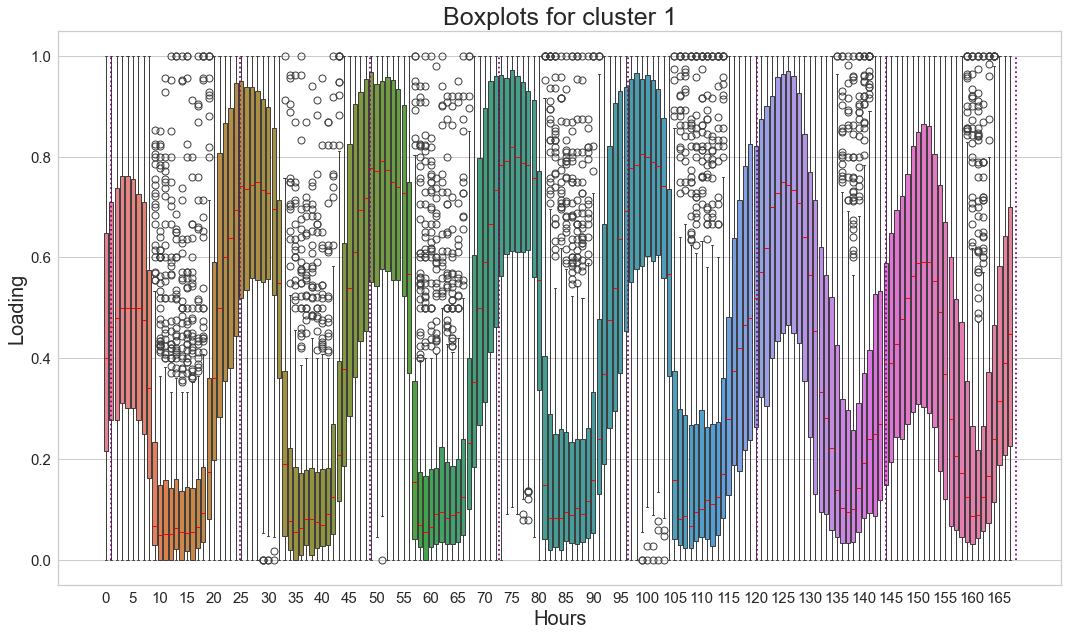

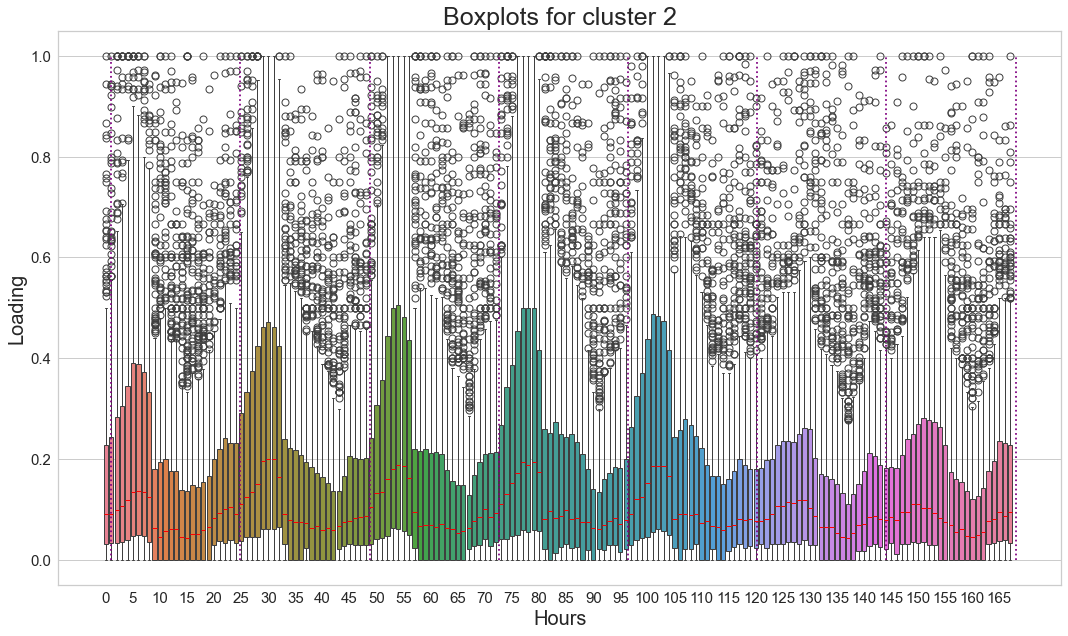

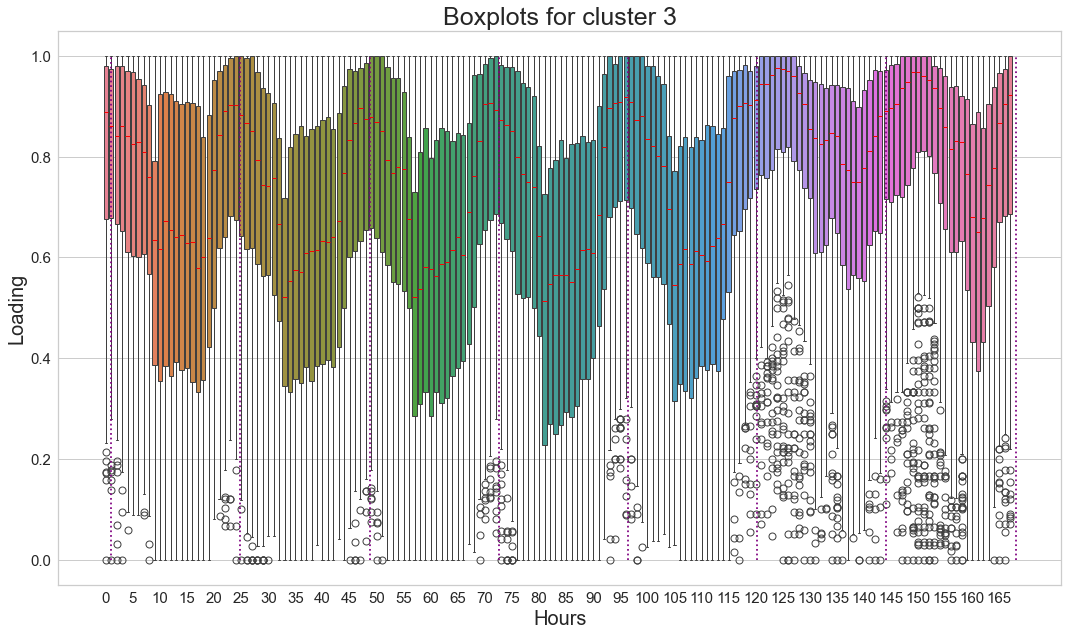

In [71]:
for i in range(4):
    indice = (clusters_pca==i).nonzero()
    indice = np.array(indice)

        
    figure(figsize = (15,9))
    sns.boxplot(data=ar[indice,:][0], medianprops={"color": "red"},)
    vlines(x = np.linspace(1, p, 8), ymin = 0, ymax = 1, colors = "purple", linestyle = "dotted",)
    

    plt.xlabel('Hours',fontsize = 20)
    plt.ylabel('Loading', fontsize = 20)
    plt.title("Boxplots for cluster " + str(i), fontsize = 25)
    plt.xticks(ticks = np.arange(0,168,5), labels=np.arange(0,168,5), fontsize= 15)
    plt.yticks(fontsize = 15)
    plt.tight_layout()
    plt.show()
    plt.show()


cluster 0 : Moyenne des chargements des stations sur les 7 jours de la semaine. Comportement périodique sur les 7 jours. On peut différentier le jour et la nuit.

Cluster 1 : Pareil que le cluster 0 mais signe opposé. 

Cluster 2: En semaine plus d'amplitude que pendant le weekend. Peu de variation entre le matin et le soir

Cluster 3 : La moyenne des chargements est haute.


# Agglomerative Clustering

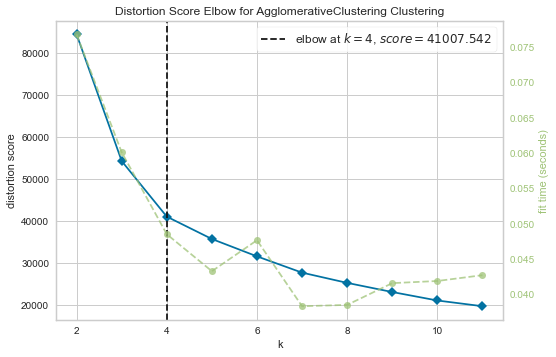

In [72]:
ac = AgglomerativeClustering(linkage='ward', compute_distances=True)
visualizer = KElbowVisualizer(ac, k=(2,12))

visualizer.fit(velib_PCA_reduced)  # Fit the data to the visualizer
visualizer.show()   
plt.show()

La méthode du coude nous suggere de prendre 4 clusters.

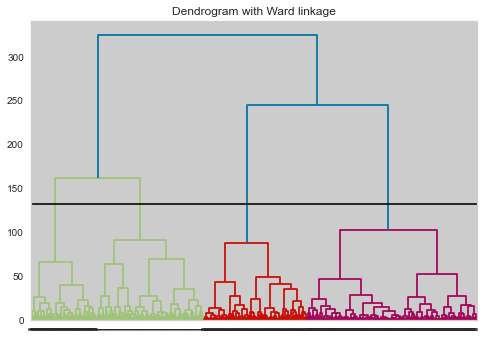

In [73]:
K = 4

ac = AgglomerativeClustering(n_clusters=K, compute_distances=True, linkage='ward')
clusters = ac.fit(velib_PCA_reduced)

children = ac.children_
distances = ac.distances_
n_observations = np.arange(2, children.shape[0]+2)
linkage_matrix = np.c_[children, distances, n_observations]

sch.dendrogram(linkage_matrix, labels=ac.labels_)

# Cutting the dendrogram to get K classes
max_d = .5*(ac.distances_[-K]+ac.distances_[-K+1])
plt.axhline(y=max_d, c='k')

plt.title("Dendrogram with Ward linkage")
plt.show()


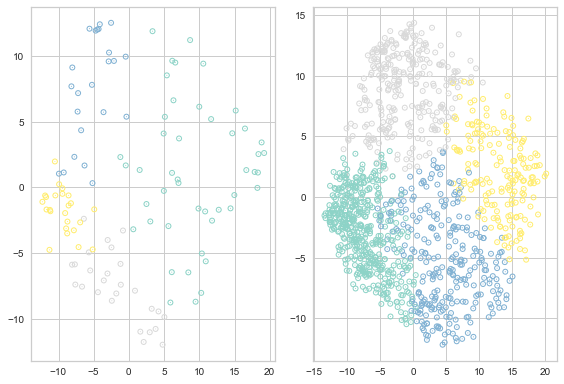

In [74]:
K = 4

cmap = plt.get_cmap('Set3', K)

# -- #

ac_ss = AgglomerativeClustering(n_clusters=K, compute_distances=True, linkage='ward')
clusters_ac_ss = ac_ss.fit_predict(velib_PCA_reduced[::10])

ac = AgglomerativeClustering(n_clusters=K, compute_distances=True, linkage='ward')
clusters_ac = ac.fit_predict(velib_PCA_reduced)

# -- #

# On the sub-sample
plt.subplot(1,2,1)
plt.scatter(velib_PCA_reduced[::10][:,0], velib_PCA_reduced[::10][:,1], c=clusters_ac_ss, s=1, linewidths=5, cmap=cmap)

# On the complete dataset
plt.subplot(1,2,2)
plt.scatter(velib_PCA_reduced[:,0], velib_PCA_reduced[:,1], c=clusters_ac, s=1, linewidths=5, cmap=cmap)

plt.tight_layout()
plt.show()


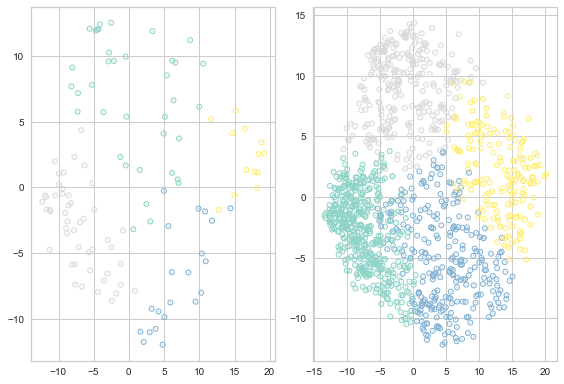

In [75]:
K = 4

cmap = plt.get_cmap('Set3', K)

# -- #

ac_ss = AgglomerativeClustering(n_clusters=K, compute_distances=True, linkage='ward')
clusters_ac_ss = ac_ss.fit_predict(loading[::10])

ac = AgglomerativeClustering(n_clusters=K, compute_distances=True, linkage='ward')
clusters_ac_raw = ac.fit_predict(loading)

# -- #

# On the sub-sample
plt.subplot(1,2,1)
plt.scatter(velib_PCA_reduced[::10][:,0], velib_PCA_reduced[::10][:,1], c=clusters_ac_ss, s=1, linewidths=5, cmap=cmap)

# On the complete dataset
plt.subplot(1,2,2)
plt.scatter(velib_PCA_reduced[:,0], velib_PCA_reduced[:,1], c=clusters_ac, s=1, linewidths=5, cmap=cmap)

plt.tight_layout()
plt.show()

Matrice de Confusion pour les clusters CAH sur le jeu de données réduit et brutes.


Classes size: [257 124 393 119]
Class (in the classif1 numbering): [2 3 0 1]



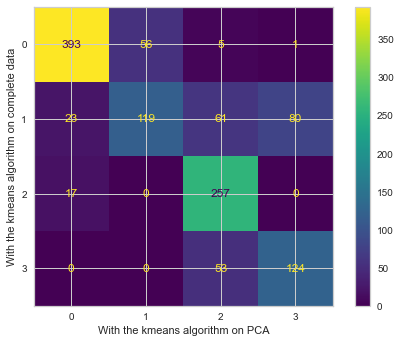

In [76]:
cm, clusters_ac_raw_sorted = matchClasses(clusters_ac, clusters_ac_raw)

ConfusionMatrixDisplay(cm).plot()
plt.xlabel('With the kmeans algorithm on PCA')
plt.ylabel('With the kmeans algorithm on complete data')

plt.show()

In [77]:

df_clusters_pca =  pd.DataFrame({
    'latitude': Position[:,1],
    'longitude': Position[:,0],
    'cluster': clusters_ac.astype(int)
    

})


fig_cluster_pca2 = px.scatter_mapbox(clusters_ac ,Position[:,1],Position[:,0], color = clusters_ac,
                        color_discrete_sequence=['red', 'blue', 'green', 'fuchsia'], 
                        size_max=15, zoom=10, mapbox_style="carto-positron",
                                   title ="Individual factor map with clusters CAH on PCA data")

fig_cluster_pca2.update_layout(showlegend=True)
fig_cluster_pca2.show()

In [78]:

df_clusters_pca =  pd.DataFrame({
    'latitude': Position[:,1],
    'longitude': Position[:,0],
    'cluster': clusters_ac_raw_sorted.astype(int)
    

})


fig_cluster_ac_raw = px.scatter_mapbox(clusters_ac_raw_sorted ,Position[:,1],Position[:,0], color = clusters_ac_raw_sorted,
                        color_discrete_sequence=['red', 'blue', 'green', 'fuchsia'], 
                        size_max=15, zoom=10, mapbox_style="carto-positron",
                                   title ="Individual factor map with clusters CAH on complete data")

fig_cluster_ac_raw.update_layout(showlegend=True)
fig_cluster_ac_raw.show()

Pareil ici peu de différences dans l'ensemble, sauf en périphérie !

# Gaussian Mixture Models

In [79]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

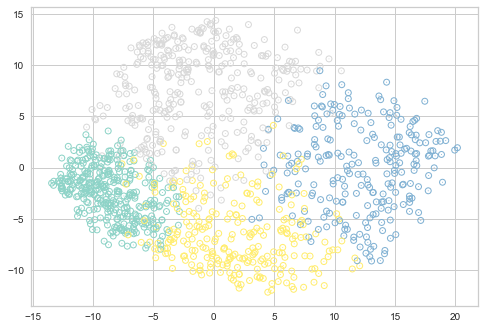

In [80]:
gmm = GaussianMixture(n_components=K, n_init=50)
clusters_gmm = gmm.fit_predict(velib_PCA_reduced)


plt.scatter(velib_PCA_reduced[:,0], velib_PCA_reduced[:,1], c=clusters_gmm, s=1, linewidths=6, cmap=cmap)

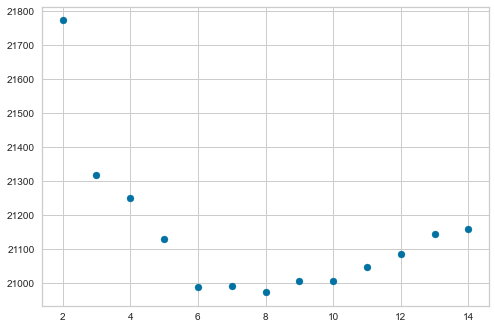

In [81]:
k_max = 15

bic = []
for k in range(2, k_max):
    gmm = GaussianMixture(n_components=k, init_params='kmeans', n_init=3)
    gmm.fit(velib_PCA_reduced)
    bic.append(gmm.bic(velib_PCA_reduced))
bic = np.array(bic)

plt.scatter(range(2, k_max), bic)
plt.show()

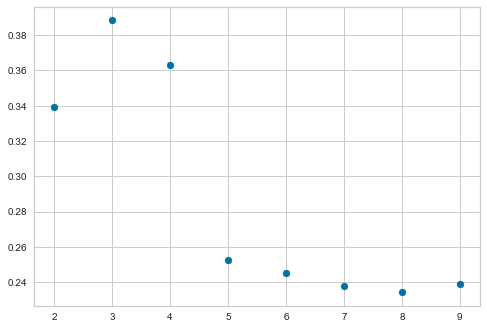

In [82]:
k_max = 10

silhouette = []
for k in range(2, k_max):
    gmm = GaussianMixture(n_components=k, init_params='kmeans', n_init=30)
    clusters_gmm = gmm.fit_predict(velib_PCA_reduced)
    silhouette.append( silhouette_score(velib_PCA_reduced, clusters_gmm, metric='euclidean') )
silhouette = np.array(silhouette)

plt.scatter(range(2, k_max), silhouette)
plt.show()


Interprétation : Le critère BIC nous dit qu'il faut 8 clusters.

In [83]:
def draw_ellipse(mean, covariance, alpha, ax, col='#CCCCCC'):
    """Draw an ellipse with a given position and covariance"""    
    # Convert covariance to principal axes
    U, s, Vt = np.linalg.svd(covariance)
    angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
    width, height = 2 * np.sqrt(s)

    # Draw the Ellipse
    ax.add_patch(Ellipse(mean, 4*width, 4*height, angle=angle, alpha=alpha, fc=col))

In [84]:
def plotGMM(gmm, data, n_clusters=6):
    gmm.fit(data)
    clusters_gmm = gmm.predict(data)
    
    ax = plt.gca()
    ax.axis('equal')
    cmap = plt.get_cmap('Set3', n_clusters)
    
    # plot the input data
    ax.scatter(data[:, 0], data[:, 1], c=clusters_gmm, s=1, linewidths=1, cmap=cmap)
    
    # w_factor = 0.2 / gmm.weights_.max()
    for i in range(n_clusters):
        mean = gmm.means_[i,:2]
        covariance = gmm.covariances_[i,:2,:2]
        w = gmm.weights_[i]
        draw_ellipse(mean, covariance, w, ax, cmap.colors[i])


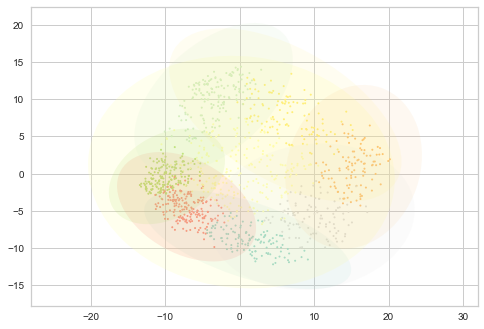

In [85]:
K = 8
gmm = GaussianMixture(n_components=K, init_params='kmeans')

plotGMM(gmm,velib_PCA_reduced ,K)

## Comparaison des clusters entre GMM et Kmeans en utilisant la matrice de confusion

In [86]:
from scipy.spatial.distance import cdist
from matplotlib.patches import Ellipse

In [87]:
def plotKmeans(kmeans, data, n_clusters=4):
    kmeans.fit(data)
    clusters_kmeans = kmeans.predict(data)

    ax = plt.gca()
    ax.axis('equal')
    cmap = plt.get_cmap('Set3', n_clusters)

    # plot the input data
    ax.scatter(data[:, 0], data[:, 1], c=clusters_kmeans, s=1, linewidths=1, cmap=cmap)
    
    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radius = [cdist(data[clusters_kmeans == i], [center]).max() for i, center in enumerate(centers)]
    for i in range(n_clusters):
        ax.add_patch(plt.Circle(centers[i], radius[i], fc=cmap.colors[i], alpha=0.3))

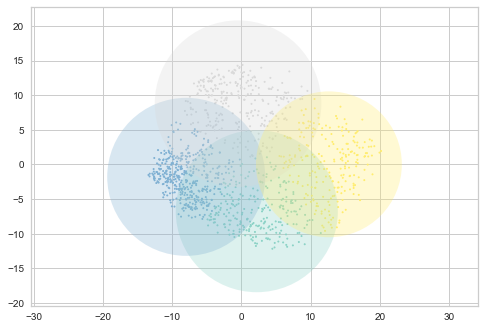

In [88]:
K = 4
kmeans = KMeans(n_clusters=K)

plotKmeans(kmeans, velib_PCA_reduced,K)

In [89]:
kmeans = KMeans(n_clusters=4, n_init=10)
clusters_kmeans = kmeans.fit_predict(velib_PCA_reduced)

gmm = GaussianMixture(n_components=8, n_init=10, init_params='kmeans')
clusters_gmm = gmm.fit_predict(velib_PCA_reduced)

In [90]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def matchClasses(classif1, classif2):
    cm = confusion_matrix(classif1, classif2)
    K = cm.shape[0]
    a, b = np.zeros(K), np.zeros(K)
    for j in range(K):
        for i in range(K):
            if (a[j] < cm[i,j]):
                a[j] = cm[i,j]
                b[j] = i 
    a = a.astype(int)
    b = b.astype(int)
                                             
    print ("")
    print ("Classes size:", a)
    print ("Class (in the classif1 numbering):", b)
    print ("")
    
    table = cm.copy()
    for i in range(K):
        table[:,b[i]] = cm[:,i]   
        
    clusters = classif2.copy()
    n = classif2.shape[0]
    for i in range(n):
        for j in range(K):
            if (classif2[i] == j):
                clusters[i] = b[j]
        
    return table, clusters


Classes size: [131 154 137 130   0   0   0   0]
Class (in the classif1 numbering): [3 5 6 2 0 0 0 0]



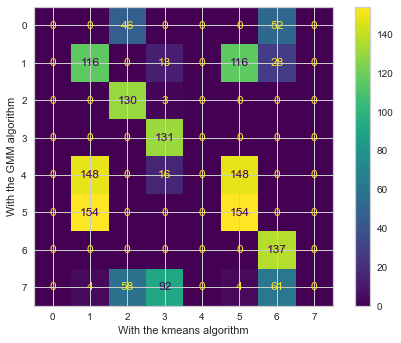

In [91]:
cm, clusters_kmeans_sorted = matchClasses(clusters_gmm, clusters_kmeans)

ConfusionMatrixDisplay(cm).plot()
plt.xlabel('With the kmeans algorithm')
plt.ylabel('With the GMM algorithm')

plt.show()

### Comparaison des clusters à l'aide de la map de Paris

In [92]:
df_clusters =  pd.DataFrame({
    'latitude': Position[:,1],
    'longitude': Position[:,0],
    'cluster': clusters_gmm.astype(int)

})

fig_cluster = px.scatter_mapbox(clusters_gmm, lat=Position[:,1], lon=Position[:,0], color=clusters_gmm,
                    color_discrete_sequence=['aliceblue', 'darkgrey', 'forestgreen', 'fuchsia'],
                  size_max=15, zoom=10,
                  mapbox_style="carto-positron", title ="Individual factor map with clusters GMM on pca")
fig_cluster.update_layout(showlegend=True)
fig_cluster.show()

In [93]:
df_clusters =  pd.DataFrame({
    'latitude': Position[:,1],
    'longitude': Position[:,0],
    'cluster': clusters_kmeans_sorted.astype(int)

})

fig_cluster = px.scatter_mapbox(clusters_kmeans_sorted, lat=Position[:,1], lon=Position[:,0], color=clusters_kmeans_sorted,
                    color_discrete_sequence=['aliceblue', 'darkgrey', 'forestgreen', 'fuchsia'],
                  size_max=15, zoom=10,
                  mapbox_style="carto-positron", title ="Individual factor map with clusters Kmeans on pca")
fig_cluster.update_layout(showlegend=True)
fig_cluster.show()

# CA

In [94]:
import numpy as np
import prince

import matplotlib.pyplot as plt
import seaborn as sns

## CA : Matrice Confusion KNN


Classes size: [257 124 393 119]
Class (in the classif1 numbering): [2 3 0 1]



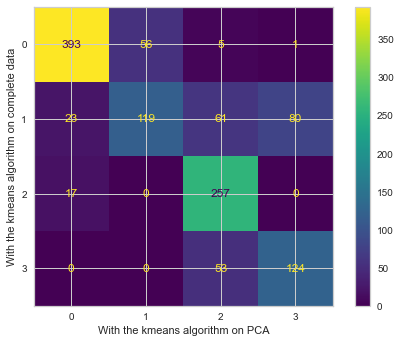

[[393  56   5   1]
 [ 23 119  61  80]
 [ 17   0 257   0]
 [  0   0  53 124]]

Pandas DataFrame: 


gr0  gr1  gr2  gr3
0  393   56    5    1
1   23  119   61   80
2   17    0  257    0
3    0    0   53  124

In [95]:
cm, clusters_ac_raw_sorted = matchClasses(clusters_ac, clusters_ac_raw)

ConfusionMatrixDisplay(cm).plot()
plt.xlabel('With the kmeans algorithm on PCA')
plt.ylabel('With the kmeans algorithm on complete data')

plt.show()

print(cm)


# convert numpy array to dataframe
df_cm = pd.DataFrame(cm, columns =['gr0', 'gr1', 'gr2', 'gr3'])
print("\nPandas DataFrame: ")
df_cm

In [96]:
ca = prince.CA(
    n_components=15,
    n_iter=10,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
)
ca = ca.fit(df_cm)

In [97]:
ca.eigenvalues_summary

eigenvalue % of variance % of variance (cumulative)
component                                                    
0              0.751        54.89%                     54.89%
1              0.444        32.47%                     87.36%
2              0.173        12.64%                    100.00%

In [98]:
ca.row_coordinates(df_cm)

0         1         2
0  1.061085  0.101109 -0.125704
1 -0.287880 -0.589482  0.632072
2 -0.869479  1.018119  0.004788
3 -0.921392 -0.893479 -0.694876

In [99]:
ca.column_coordinates(df_cm)

0         1         2
gr0  1.054149  0.150662 -0.193118
gr1  0.165903 -0.552810  0.936590
gr2 -0.873158  0.713586  0.014898
gr3 -0.766695 -1.155138 -0.418949

In [100]:
ca.plot(
    df_cm,
    x_component=0,
    y_component=1,
    show_row_markers=True,
    show_column_markers=True,
    show_row_labels=False,
    show_column_labels=False
)

alt.LayerChart(...)

In [103]:
ca.row_contributions_.style.format('{:.0%}')

OptionError: "No such keys(s): 'styler.format.precision'"

In [102]:
ca.column_contributions_.style.format('{:.0%}')

OptionError: "No such keys(s): 'styler.format.precision'"

In [104]:
ca.row_cosine_similarities(df_cm)

0         1         2
0  0.977408  0.008875  0.013717
1  0.099864  0.418723  0.481414
2  0.421734  0.578253  0.000013
3  0.398552  0.374770  0.226678

In [105]:
ca.column_cosine_similarities(df_cm)

0         1         2
gr0  0.948777  0.019381  0.031843
gr1  0.022741  0.252493  0.724766
gr2  0.599454  0.400371  0.000175
gr3  0.280224  0.636104  0.083672

## CA : Matrice Confusion KNN et GMM


Classes size: [131 154 137 130   0   0   0   0]
Class (in the classif1 numbering): [3 5 6 2 0 0 0 0]



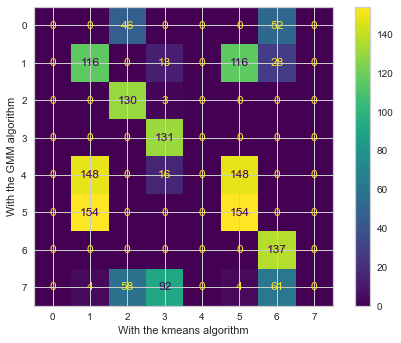

[[  0   0  46   0   0   0  52   0]
 [  0 116   0  13   0 116  28   0]
 [  0   0 130   3   0   0   0   0]
 [  0   0   0 131   0   0   0   0]
 [  0 148   0  16   0 148   0   0]
 [  0 154   0   0   0 154   0   0]
 [  0   0   0   0   0   0 137   0]
 [  0   4  58  92   0   4  61   0]]

Pandas DataFrame: 
0
0


In [209]:
cm_gmm_kmeans, clusters_kmeans_sorted = matchClasses(clusters_gmm, clusters_kmeans)

ConfusionMatrixDisplay(cm_gmm_kmeans).plot()
plt.xlabel('With the kmeans algorithm')
plt.ylabel('With the GMM algorithm')

plt.show()

print(cm_gmm_kmeans)


# convert numpy array to dataframe
df_cm_gmm_kmeans = pd.DataFrame(cm_gmm_kmeans, columns =['gr0', 'gr1', 'gr2', 'gr3', 'gr4', 'gr5', 'gr6', 'gr7'])
print("\nPandas DataFrame: ")
df_cm_gmm_kmeans

#df_cm_gmm_kmeans.replace(0, np.inf, inplace=True)

#df_cm_gmm_kmeans

# Check for missing or infinite values
missing_values = df_cm_gmm_kmeans.isnull().sum().sum()
print(missing_values)
infinite_values = np.isinf(df_cm_gmm_kmeans).sum().sum()
print(infinite_values)

In [210]:
ca_gmm_knn = prince.CA(
    n_components=15,
    n_iter=10,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
)
ca_gmm_knn = ca_gmm_knn.fit(df_cm_gmm_kmeans)

c:\Users\romai\miniconda3\lib\site-packages\prince\ca.py:83: RuntimeWarning:

divide by zero encountered in power



ValueError: array must not contain infs or NaNs

In [211]:
ca_gmm_knn.eigenvalues_summary

AttributeError: 'CA' object has no attribute 'svd_'

In [212]:
ca_gmm_knn.row_coordinates(df_cm_gmm_kmeans)

c:\Users\romai\miniconda3\lib\site-packages\prince\ca.py:159: RuntimeWarning:

divide by zero encountered in power



AttributeError: 'CA' object has no attribute 'svd_'

In [213]:
ca_gmm_knn.column_coordinates(df_cm_gmm_kmeans)

c:\Users\romai\miniconda3\lib\site-packages\prince\ca.py:217: RuntimeWarning:

invalid value encountered in divide



AttributeError: 'CA' object has no attribute 'svd_'

In [214]:
ca_gmm_knn.plot(
    df_cm_gmm_kmeans,
    x_component=0,
    y_component=1,
    show_row_markers=True,
    show_column_markers=True,
    show_row_labels=False,
    show_column_labels=False
)

AttributeError: 'CA' object has no attribute 'svd_'

In [215]:
ca_gmm_knn.row_contributions_.style.format('{:.0%}')

AttributeError: 'CA' object has no attribute 'row_contributions_'

In [216]:
ca_gmm_knn.column_contributions_.style.format('{:.0%}')

AttributeError: 'CA' object has no attribute 'column_contributions_'

In [217]:
ca_gmm_knn.row_cosine_similarities(df_cm_gmm_kmeans)

AttributeError: 'CA' object has no attribute 'svd_'

In [218]:
ca_gmm_knn.column_cosine_similarities(df_cm_gmm_kmeans)

AttributeError: 'CA' object has no attribute 'svd_'

# MCA

## MCA sur toutes les données

In [139]:
# Définis les seuils
seuils = {
    'Vide': 0.2,
    'Faible': 0.4,
    'Moyen': 0.6,
    'Fort': 0.8,
    'Pleine': 1.0
}

# Définis les seuils
seuilsV2 = {
    'Vide': 0.33,
    'Moyen': 0.66,
    'Pleine': 1.0
}

seuilsV3 = {
    'Totalement Vide': 0.1,
    'Très Vide': 0.2,
    'Assez Faible': 0.3,
    'Faible': 0.4,
    'Moyen': 0.5,
    'Pas mal': 0.6,
    'Bien': 0.7,
    'Très Bien': 0.8,
    'Quasiment Pleine': 0.9,
    'Pleine': 1.0
}

# Définis les seuils
seuilsV4 = {
    'Vide': 0.5,
    'Plein': 1,
}

#Convertis les données en valeurs de seuil
def convert_to_threshold(value):
    for seuil, threshold in seuils.items():
        if value <= threshold:
            return seuil
    return 'très élevé'  # Si la valeur dépasse le seuil maximal

#Applique la fonction de conversion à chaque cellule du DataFrame
loading_quali = loading.applymap(convert_to_threshold)

loading_quali['Hill'] = Coord['bonus'].map({0: 'FAUX', 1:'VRAI'})
loading_quali['Hill2'] = Coord['bonus']




#Affiche le DataFrame avec les données qualitatives
loading_quali.head()

Lun-00  Lun-01  Lun-02  Lun-03  Lun-04  Lun-05  Lun-06  Lun-07  Lun-08  \
1    Vide    Vide    Vide    Vide    Vide    Vide    Vide    Vide    Vide   
2   Moyen   Moyen   Moyen   Moyen   Moyen   Moyen   Moyen   Moyen  Faible   
3  Faible    Vide    Vide    Vide    Vide    Vide    Vide    Vide    Vide   
4  Pleine  Pleine  Pleine  Pleine  Pleine  Pleine  Pleine  Pleine  Pleine   
5  Pleine  Pleine    Fort    Fort    Fort    Fort    Fort    Fort    Fort   

   Lun-09  ...  Dim-16  Dim-17  Dim-18  Dim-19  Dim-20  Dim-21  Dim-22  \
1    Vide  ...    Vide    Vide  Faible    Vide    Vide    Vide    Vide   
2    Vide  ...  Faible    Vide    Vide    Vide    Vide    Vide  Faible   
3    Vide  ...  Faible    Vide    Vide  Faible  Faible  Faible  Faible   
4  Pleine  ...  Pleine  Pleine  Pleine  Pleine    Fort    Fort    Fort   
5  Pleine  ...   Moyen  Pleine  Pleine  Pleine    Fort    Fort    Fort   

   Dim-23  Hill Hill2  
1    Vide  FAUX     0  
2  Faible  FAUX     0  
3   Moyen  FAUX     0  
4    Fort  FAUX     0  
5   Moyen  FAUX     0  

[5 rows x 170 columns]

In [140]:
mca = prince.MCA(
    n_components=10,
    n_iter=50,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
)
mca = mca.fit(loading_quali)

In [141]:
display(mca.eigenvalues_summary)

mca.scree_plot()

#vap sup à 1, mieux qu'avant en term de variances expliquées
#vap inf à 1, moins bien qu'avant

eigenvalue % of variance % of variance (cumulative)
component                                                    
0              0.393         9.92%                      9.92%
1              0.234         5.91%                     15.83%
2              0.119         3.00%                     18.84%
3              0.078         1.96%                     20.79%
4              0.068         1.71%                     22.50%
5              0.057         1.44%                     23.94%
6              0.053         1.33%                     25.27%
7              0.048         1.20%                     26.48%
8              0.045         1.13%                     27.61%
9              0.041         1.04%                     28.65%

alt.Chart(...)

In [142]:
mca.plot(
    loading_quali,
    x_component=0,
    y_component=1,
    show_column_markers=True,
    show_row_markers=True,
    show_column_labels=False,
    show_row_labels=False
)

#on projette dans ce graphe le résultat de la MCA 
#Elle affiche de couleurs diff si la personne a survécu ou non 

alt.LayerChart(...)

In [143]:
#ESt-ce qu'on peut faire en sorte 

def plot_mca(ax1=0, ax2=1, mca=mca, data2=loading_quali):
    dataset = mca.transform(data2)
    dataset.reset_index(inplace=True)
    sns.scatterplot(data = dataset, x = ax1, y = ax2, hue=data2['Hill2'],alpha = 0.7)
    plt.xlabel('Component {} — {:.2f}%'.format(ax1, mca.percentage_of_variance_[ax1]))
    plt.ylabel('Component {} — {:.2f}%'.format(ax2, mca.percentage_of_variance_[ax2]))
    plt.grid(True)
    plt.show()
    sns.scatterplot(data = dataset, x = ax1, y = ax2, hue=data2['Lun-00'],alpha = 0.7)
    plt.xlabel('Component {} — {:.2f}%'.format(ax1, mca.percentage_of_variance_[ax1]))
    plt.ylabel('Component {} — {:.2f}%'.format(ax2, mca.percentage_of_variance_[ax2]))
    plt.grid(True)
    plt.show()

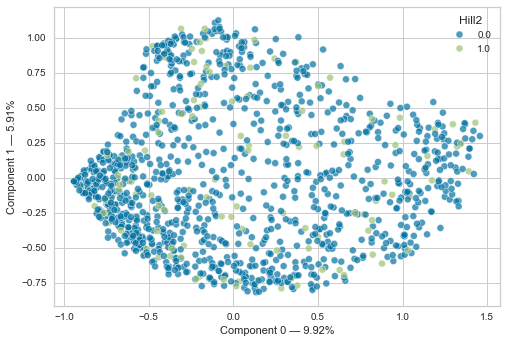

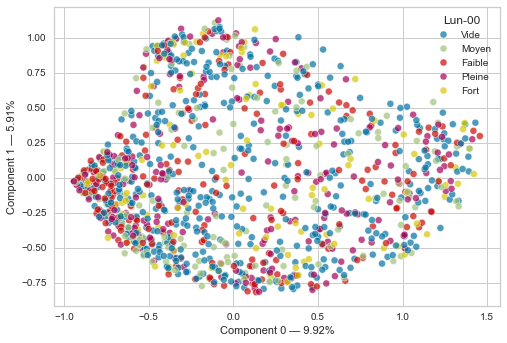

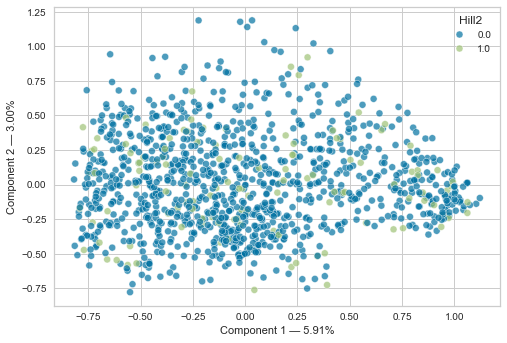

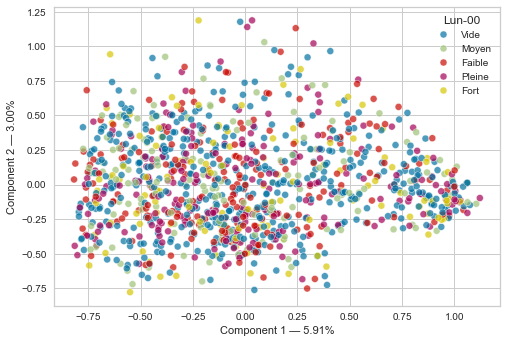

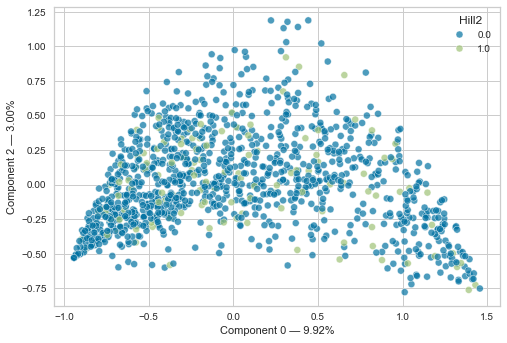

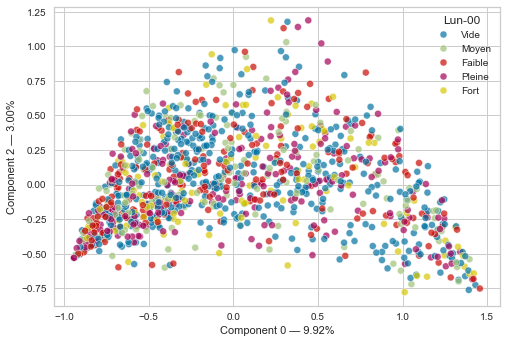

In [144]:
plot_mca(0,1)
plot_mca(1,2)
plot_mca(0,2)

In [145]:
#contrib = mca.column_contributions_.style.format('{:.1%}')
#display(contrib.highlight_max(color='orange').highlight_min(color='lightblue'))
contrib = mca.column_contributions_
display(contrib)

0         1         2             3         4         5  \
Lun-00_Faible  0.000048  0.000054  0.002972  1.020368e-07  0.001208  0.000047   
Lun-00_Fort    0.000764  0.000031  0.000002  6.167016e-05  0.000092  0.000014   
Lun-00_Moyen   0.000063  0.000049  0.000962  4.817546e-05  0.000125  0.000714   
Lun-00_Pleine  0.003872  0.000045  0.000654  2.039212e-05  0.000061  0.000721   
Lun-00_Vide    0.003204  0.000002  0.001252  8.114336e-06  0.000828  0.000011   
...                 ...       ...       ...           ...       ...       ...   
Dim-23_Vide    0.003000  0.000095  0.001151  1.160957e-04  0.000500  0.000100   
Hill_FAUX      0.000183  0.000065  0.000174  1.146510e-04  0.000219  0.000061   
Hill_VRAI      0.001531  0.000546  0.001458  9.587347e-04  0.001832  0.000513   
Hill2_0        0.000183  0.000065  0.000174  1.146510e-04  0.000219  0.000061   
Hill2_1        0.001531  0.000546  0.001458  9.587347e-04  0.001832  0.000513   

                      6             7         8         9  
Lun-00_Faible  0.000226  2.010199e-03  0.009497  0.000346  
Lun-00_Fort    0.000150  1.036734e-03  0.001318  0.000776  
Lun-00_Moyen   0.000987  3.795878e-04  0.000926  0.001650  
Lun-00_Pleine  0.003304  2.101263e-03  0.009022  0.000030  
Lun-00_Vide    0.000028  8.612093e-04  0.000003  0.002847  
...                 ...           ...       ...       ...  
Dim-23_Vide    0.000004  8.263649e-05  0.000331  0.001201  
Hill_FAUX      0.000100  5.019888e-07  0.000032  0.000233  
Hill_VRAI      0.000834  4.197733e-06  0.000267  0.001946  
Hill2_0        0.000100  5.019888e-07  0.000032  0.000233  
Hill2_1        0.000834  4.197733e-06  0.000267  0.001946  

[844 rows x 10 columns]

In [146]:
#individus bien rep ? 
#ex : premier ind bien rep par la composante 10
"""quality_row = mca.row_cosine_similarities(loading_quali).head(10).style.format('{:.3}')
display(quality_row)

quality_column = mca.column_cosine_similarities(loading_quali).style.format('{:.3}')
display(quality_column.background_gradient())"""

quality_row = mca.row_cosine_similarities(loading_quali).head(10)
display(quality_row)

quality_column = mca.column_cosine_similarities(loading_quali)
display(quality_column)

0         1         2         3         4         5         6  \
1   0.027903  0.091625  0.020834  0.049748  0.035335  0.003784  0.003299   
2   0.059227  0.165863  0.042331  0.001291  0.118072  0.009842  0.004905   
3   0.014264  0.001220  0.154680  0.015138  0.000036  0.015951  0.001383   
4   0.000212  0.162480  0.000158  0.002010  0.012724  0.002754  0.030301   
5   0.017020  0.047560  0.093618  0.019609  0.003630  0.000007  0.003077   
6   0.000418  0.052104  0.008159  0.002024  0.020471  0.004767  0.061471   
7   0.006501  0.067108  0.084825  0.000170  0.000561  0.007637  0.064309   
8   0.002418  0.108795  0.087966  0.024192  0.020288  0.010494  0.105921   
9   0.081770  0.000904  0.087506  0.001753  0.013564  0.004654  0.016854   
10  0.000534  0.000284  0.015749  0.001610  0.003334  0.001603  0.047535   

           7         8         9  
1   0.062748  0.000310  0.005623  
2   0.000390  0.009774  0.000206  
3   0.002754  0.010098  0.060589  
4   0.002509  0.033365  0.028020  
5   0.006003  0.003515  0.001640  
6   0.005426  0.001164  0.000015  
7   0.023297  0.002183  0.013314  
8   0.064253  0.011508  0.008419  
9   0.000758  0.187899  0.046272  
10  0.123589  0.039093  0.037419

0         1         2         3         4         5  \
Lun-00_Faible  0.003849  0.002601  0.072854  0.000002  0.016860  0.000551   
Lun-00_Fort    0.056887  0.001385  0.000054  0.000905  0.001176  0.000156   
Lun-00_Moyen   0.004826  0.002238  0.022454  0.000732  0.001664  0.007962   
Lun-00_Pleine  0.319370  0.002213  0.016333  0.000331  0.000861  0.008603   
Lun-00_Vide    0.358390  0.000136  0.042385  0.000179  0.015967  0.000183   
...                 ...       ...       ...       ...       ...       ...   
Dim-23_Vide    0.343794  0.006488  0.039935  0.002621  0.009870  0.001656   
Hill_FAUX      0.114605  0.024359  0.033044  0.014144  0.023639  0.005553   
Hill_VRAI      0.114605  0.024359  0.033044  0.014144  0.023639  0.005553   
Hill2_0        0.114605  0.024359  0.033044  0.014144  0.023639  0.005553   
Hill2_1        0.114605  0.024359  0.033044  0.014144  0.023639  0.005553   

                      6         7         8         9  
Lun-00_Faible  0.002461  0.019748  0.087625  0.002935  
Lun-00_Fort    0.001506  0.009365  0.011179  0.006054  
Lun-00_Moyen   0.010236  0.003552  0.008138  0.013336  
Lun-00_Pleine  0.036636  0.021028  0.084801  0.000258  
Lun-00_Vide    0.000423  0.011685  0.000042  0.033366  
...                 ...       ...       ...       ...  
Dim-23_Vide    0.000056  0.001149  0.004320  0.014417  
Hill_FAUX      0.008399  0.000038  0.002278  0.015267  
Hill_VRAI      0.008399  0.000038  0.002278  0.015267  
Hill2_0        0.008399  0.000038  0.002278  0.015267  
Hill2_1        0.008399  0.000038  0.002278  0.015267  

[844 rows x 10 columns]

## MCA sur les données jours nuit
Exemple : 

Lundi jour : Lun-07 à Lun-21

Lundi nuit : Lun-22 à Mar-06

In [147]:
labels = ['Hill','Nohill']

X_quali = pd.DataFrame({'hill' : Coord['bonus'].map(dict(zip([0, 1], labels)))})
jour = list(range(7,20)) # on se dit que la journée est de 7h à 21h
nuit = list(range(1,20)) # pareil pour la nuit mais de 21h à 7h
load = ['chargé', 'moyen', 'vide']

In [208]:
# on rassemble les heures de la journée par jour 

for i in range(1, 8):
    hour_offset = [x + (i-1)*24 for x in jour]
    newCol = loading.iloc[:, jour[0]+(i-1)*24: jour[-1]+ (i-1)*24+1].mean(axis=1)
    breaks = [-0.01, newCol.quantile(1/3), newCol.quantile(2/3),1.01]
    newCol = pd.cut(newCol, bins=breaks, labels=load)
    newName_jour = 'Jour' + str(i)
    X_quali[newName_jour] = newCol
    

In [171]:
#On rassemble les heures de la nuit par jour et on fait une moyenne pareil  

for i in range(1,8):
    newCol = loading.iloc[:, nuit[0]+(i-1)*24 : nuit[-1]+(i-1)*24+1].mean(axis=1)
    breaks = [-0.01, newCol.quantile(1/3), newCol.quantile(2/3), 1.01]
    newCol = pd.cut(newCol, bins=breaks, labels = load)
    newName_nuit = f"nuit{i}"
    X_quali[newName_nuit] = newCol.values

In [172]:
X_quali.head()

hill   Jour1   Jour2   Jour3   Jour4   Jour5  Jour6  Jour7   nuit1  nuit2  \
1  Hill  chargé  chargé  chargé  chargé  chargé  moyen  moyen  chargé  moyen   
2  Hill  chargé   moyen   moyen   moyen   moyen  moyen  moyen   moyen   vide   
3  Hill   moyen    vide   moyen   moyen    vide   vide  moyen   moyen   vide   
4  Hill    vide    vide   moyen    vide    vide  moyen   vide    vide  moyen   
5  Hill    vide    vide    vide    vide    vide  moyen  moyen    vide   vide   

    nuit3   nuit4  nuit5  nuit6   nuit7  
1  chargé  chargé  moyen  moyen  chargé  
2   moyen   moyen  moyen   vide   moyen  
3   moyen   moyen   vide   vide   moyen  
4   moyen   moyen  moyen  moyen    vide  
5    vide   moyen   vide  moyen   moyen

In [173]:
X_quali.shape

(1189, 15)

In [192]:
mca = prince.MCA(n_components = 2, n_iter = 3, copy=True, check_input = True, engine='sklearn', random_state=42) #Pourquoi 2 ????
mca.fit(X_quali)



MCA(n_iter=3, random_state=42)

In [193]:
display(mca.eigenvalues_summary)

mca.scree_plot()

eigenvalue % of variance % of variance (cumulative)
component                                                    
0              0.578        29.92%                     29.92%
1              0.217        11.24%                     41.16%

alt.Chart(...)

In [194]:
type(X_quali)

pandas.core.frame.DataFrame

In [196]:
ax = mca.plot_coordinates(
    X=X_quali,
    ax=None,
    figsize=(8, 8),
    x_component=0,
    y_component=1,
    show_row_points=True,
    row_points_size=10,
    show_row_labels=False,
    show_column_points=True,
    column_points_size=30,
    show_column_labels=False,
    legend_n_cols=1
)
plt.show()

#Ça marche pas pour moi peut être utilisé plot_mca


AttributeError: 'MCA' object has no attribute 'plot_coordinates'

In [197]:
mca.plot(
    X_quali,
    x_component=0,
    y_component=1,
    show_column_markers=True,
    show_row_markers=True,
    show_column_labels=False,
    show_row_labels=False
)

alt.LayerChart(...)

In [199]:
velib_mca_reduced = mca.row_coordinates(X_quali)
velib_mca_reduced

0         1
1     0.761771  0.072554
2    -0.121546  0.983134
3    -0.517825  0.514229
4    -0.601020  0.250575
5    -0.768671 -0.102369
...        ...       ...
1185  0.934457 -0.197998
1186 -0.368263  0.725134
1187  0.480530  0.158645
1188 -0.491196 -0.348847
1189 -0.943047 -0.308303

[1189 rows x 2 columns]

In [200]:
"""contrib = mca.column_contributions_.style.format('{:.1%}')
display(contrib.highlight_max(color='orange').highlight_min(color='lightblue'))"""

contrib = mca.column_contributions_
display(contrib)

0         1
hill_Hill     2.309436e-03  0.001390
hill_Nohill   1.931197e-02  0.011622
Jour1_chargé  3.599734e-02  0.005007
Jour1_moyen   3.307292e-05  0.049084
Jour1_vide    3.376292e-02  0.022679
Jour2_chargé  4.137162e-02  0.008148
Jour2_moyen   1.475380e-04  0.057196
Jour2_vide    3.669356e-02  0.021865
Jour3_chargé  3.960000e-02  0.008836
Jour3_moyen   1.255268e-04  0.059331
Jour3_vide    3.527705e-02  0.022191
Jour4_chargé  3.971761e-02  0.006791
Jour4_moyen   2.882656e-04  0.046177
Jour4_vide    3.315481e-02  0.017507
Jour5_chargé  4.305109e-02  0.008365
Jour5_moyen   4.226563e-04  0.058552
Jour5_vide    3.496182e-02  0.022472
Jour6_chargé  3.006934e-02  0.014322
Jour6_moyen   1.406901e-05  0.035926
Jour6_vide    3.130520e-02  0.004869
Jour7_chargé  3.000981e-02  0.015227
Jour7_moyen   3.377764e-05  0.046666
Jour7_vide    3.197645e-02  0.008558
nuit1_chargé  3.621423e-02  0.006662
nuit1_moyen   2.397062e-08  0.050085
nuit1_vide    3.615525e-02  0.020294
nuit2_chargé  3.749055e-02  0.008265
nuit2_moyen   1.152834e-05  0.045877
nuit2_vide    3.881354e-02  0.015065
nuit3_chargé  3.608365e-02  0.008506
nuit3_moyen   2.197782e-07  0.047941
nuit3_vide    3.626220e-02  0.016130
nuit4_chargé  3.620069e-02  0.010653
nuit4_moyen   1.240926e-05  0.042027
nuit4_vide    3.478477e-02  0.010335
nuit5_chargé  4.064254e-02  0.009717
nuit5_moyen   3.441615e-04  0.040055
nuit5_vide    3.349813e-02  0.010367
nuit6_chargé  2.769385e-02  0.015529
nuit6_moyen   1.311862e-05  0.024118
nuit6_vide    2.643472e-02  0.000939
nuit7_chargé  2.985367e-02  0.016980
nuit7_moyen   5.019295e-08  0.042086
nuit7_vide    2.985575e-02  0.005587

In [201]:
"""quality_row = mca.row_cosine_similarities(X_quali).head(10).style.format('{:.3}')
display(quality_row)

quality_comun = mca.column_cosine_similarities(X_quali).style.format('{:.3}')
display(quality_comun.background_gradient())"""

quality_row = mca.row_cosine_similarities(X_quali).head(10)
display(quality_row)

quality_comun = mca.column_cosine_similarities(X_quali)
display(quality_comun)

0         1
1   0.309493  0.002808
2   0.007873  0.515081
3   0.143088  0.141107
4   0.192759  0.033505
5   0.315296  0.005592
6   0.056271  0.046897
7   0.000149  0.410531
8   0.004420  0.110834
9   0.318588  0.007047
10  0.022828  0.008891

0         1
hill_Hill     1.876048e-01  0.042414
hill_Nohill   1.876048e-01  0.042414
Jour1_chargé  4.683159e-01  0.024474
Jour1_moyen   4.302701e-04  0.239901
Jour1_vide    4.398013e-01  0.110985
Jour2_chargé  5.395948e-01  0.039926
Jour2_moyen   1.914602e-03  0.278845
Jour2_vide    4.779763e-01  0.107003
Jour3_chargé  5.158360e-01  0.043241
Jour3_moyen   1.631014e-03  0.289619
Jour3_vide    4.595247e-01  0.108595
Jour4_chargé  5.167157e-01  0.033190
Jour4_moyen   3.750260e-03  0.225693
Jour4_vide    4.318801e-01  0.085676
Jour5_chargé  5.607906e-01  0.040934
Jour5_moyen   5.491722e-03  0.285812
Jour5_vide    4.554185e-01  0.109970
Jour6_chargé  3.911943e-01  0.070001
Jour6_moyen   1.830342e-04  0.175588
Jour6_vide    4.077867e-01  0.023826
Jour7_chargé  3.904197e-01  0.074421
Jour7_moyen   4.394382e-04  0.228084
Jour7_vide    4.165305e-01  0.041882
nuit1_chargé  4.711376e-01  0.032562
nuit1_moyen   3.122453e-07  0.245099
nuit1_vide    4.703704e-01  0.099186
nuit2_chargé  4.883580e-01  0.040446
nuit2_moyen   1.497918e-04  0.223944
nuit2_vide    5.055916e-01  0.073721
nuit3_chargé  4.694389e-01  0.041574
nuit3_moyen   2.862867e-06  0.234611
nuit3_vide    4.717618e-01  0.078835
nuit4_chargé  4.709614e-01  0.052067
nuit4_moyen   1.614413e-04  0.205409
nuit4_vide    4.531122e-01  0.050579
nuit5_chargé  5.287488e-01  0.047492
nuit5_moyen   4.483105e-03  0.196019
nuit5_vide    4.358019e-01  0.050667
nuit6_chargé  3.602897e-01  0.075898
nuit6_moyen   1.706698e-04  0.117877
nuit6_vide    3.443430e-01  0.004596
nuit7_chargé  3.883884e-01  0.082991
nuit7_moyen   6.529971e-07  0.205695
nuit7_vide    3.889059e-01  0.027341

## Clustering Kmeans sur la MCA

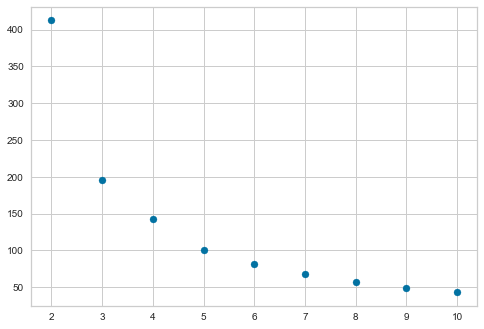

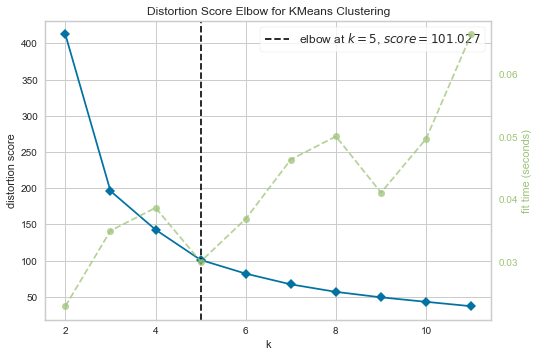

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [202]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=42)
    kmeans.fit(velib_mca_reduced)
    inertia.append(kmeans.inertia_)
inertia = np.array(inertia)

plt.scatter(range(2, 11), inertia[1:])
plt.show()


# --- #


# Using yellowbrick

kmeans = KMeans(init='k-means++', n_init=10, max_iter=100, random_state=42)
visualizer = KElbowVisualizer(kmeans, k=(2,12))

visualizer.fit(velib_mca_reduced)    # Fit the data to the visualizer
visualizer.show()    # Finalize and render the figure

In [203]:
K = 5
kmeans_mca = KMeans(n_clusters=K, random_state=0)
clusters_kmeans_mca = kmeans_mca.fit_predict(velib_mca_reduced)

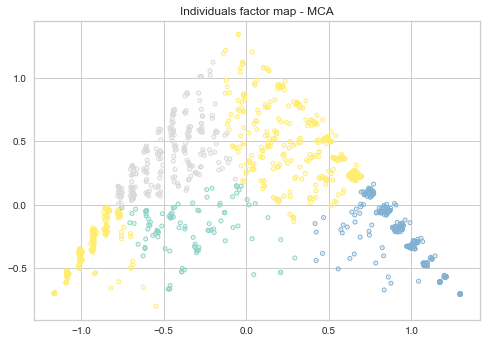

In [204]:
plt.scatter(velib_mca_reduced[0], velib_mca_reduced[1], c=clusters_kmeans_mca, s=1, linewidths=4, cmap=cmap)
plt.title("Individuals factor map - MCA")
plt.show()

In [189]:
df_clusters =  pd.DataFrame({
    'latitude': Position[:,1],
    'longitude': Position[:,0],
    'cluster': clusters_kmeans_mca.astype(int)

})

fig_cluster = px.scatter_mapbox(clusters_kmeans_mca, lat=Position[:,1], lon=Position[:,0], color=clusters_kmeans_mca,
                    color_discrete_sequence=px.colors.qualitative.Set1,
                  size_max=15, zoom=10,
                  mapbox_style="carto-positron", title ="Individual factor map with clusters MCA")
fig_cluster.update_layout(showlegend=True)
fig_cluster.show()

In [205]:
K = 5
kmeans_pca = KMeans(n_clusters=K, random_state=0)
clusters_kmeans_pca = kmeans_pca.fit_predict(velib_PCA_reduced)

In [206]:
df_clusters =  pd.DataFrame({
    'latitude': Position[:,1],
    'longitude': Position[:,0],
    'cluster': clusters_kmeans_pca.astype(int)

})

fig_cluster = px.scatter_mapbox(clusters_kmeans_pca, lat=Position[:,1], lon=Position[:,0], color=clusters_kmeans_pca,
                    color_discrete_sequence=px.colors.qualitative.Set1,
                  size_max=15, zoom=10,
                  mapbox_style="carto-positron", title ="Individual factor map with clusters MCA")
fig_cluster.update_layout(showlegend=True)
fig_cluster.show()